## Загрузка и изучение данных

Импортируем все необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np
import sklearn
import time

#загружаем библиотеку для проверки корректности url ссылки
import requests
#загружаем библиотеку для корректной загрузки датасетов
import os

#загружаем библиотеку для корреляционного анализа
import phik

#загружаем классы для визуализации
from matplotlib import pyplot as plt
import seaborn as sns

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функции для работы с метриками
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

#загружаем инструменты для подбора гиперпараметров
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#загружаем библиотеку и класс для просчитывания важности признаков
from sklearn.inspection import permutation_importance
import shap

Загружаем файлы датасетов, создаем датафреймы, выводим первые 15 строк и основную информацию о них для ознакомления

In [3]:
pth1 = '/datasets/market_file.csv'
pth2 = 'https://.../datasets/data.csv' #часть ссылки скрыта ввиду NDA
pth3 = 'market_file.csv'
if os.path.exists(pth1):
    data_main = pd.read_csv(pth1, sep=',', decimal = '.')
    data_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal = '.')
    data_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal = '.')
    data_profit = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')
#добавляем проверку корректности url ссылки при помощи requests.get(url) и проверки status_code == 200
elif requests.get(pth2).status_code == 200:
    data_main = pd.read_csv(pth2, sep=',', decimal = '.')
    data_money = pd.read_csv('https://.../datasets/market_money.csv', sep=',', decimal = '.') #часть ссылки скрыта ввиду NDA
    data_time = pd.read_csv('https://.../datasets/market_time.csv', sep=',', decimal = '.') #часть ссылки скрыта ввиду NDA
    data_profit = pd.read_csv('https://.../datasets/money.csv', sep=';', decimal = ',') #часть ссылки скрыта ввиду NDA
elif os.path.exists(pth3):
    data_main = pd.read_csv(pth3, sep=',', decimal = '.')
    data_money = pd.read_csv('market_money.csv', sep=',', decimal = '.')
    data_time = pd.read_csv('market_time.csv', sep=',', decimal = '.')
    data_profit = pd.read_csv('money.csv', sep=';', decimal = ',')
else:
    print('Something is wrong')


#выводим первые 15 строк и основную информацию для каждого датафрейма    
for d in [data_main,data_money,data_time,data_profit]:
    display(d.head(15))
    d.info()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Созданные датафреймы:**
- имеют следующие размерности:
    - data_main - 1300 строк;
    - data_money - 3900 строк;
    - data_time - 2600 строк;
    - data_profit - 1300 строк.
- не имеют явных пропусков
- столбцы имеют корректные типы данных
- названия столбцов не приведены к змеиному "регистру" (имеют разные регистры и пробелы в названии)
- в столбцах присутствуют неявные дубликаты

##  Предобработка данных

### Переименование столбцов

Для начала приведем названия столбцов к нижнему регистру и заменим пробелы в названиях на символ `_`

In [4]:
for d in [data_main,data_money,data_time,data_profit]:
    d.columns = d.columns.str.lower()
    d.columns = d.columns.str.replace(' ','_')
    print(d.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


**Столбцы приведены к змеиному регистру и заменены пробелы в названиях**

### Удаление пропусков

Посчитаем все пропуски во всех датафреймах, подтвердив результаты первичного ознакомления

In [5]:
for d in [data_main,data_money,data_time,data_profit]:
    print(d.isna().sum())

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64
id         0
период     0
выручка    0
dtype: int64
id        0
период    0
минут     0
dtype: int64
id         0
прибыль    0
dtype: int64


**Во всех датафреймах отсутствуют явные пропуски**

### Аномальные значения

Выведем описательные статистики для всех количественных столбцов

In [6]:
for d in [data_main,data_money,data_time,data_profit]:
    display(round(d.describe().T,2))

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.50,375.42,215348.0,215672.75,215997.50,216322.25,216647.00
маркет_актив_6_мес,1300.0,4.25,1.01,0.9,3.70,4.20,4.90,6.60
маркет_актив_тек_мес,1300.0,4.01,0.70,3.0,4.00,4.00,4.00,5.00
длительность,1300.0,601.90,249.86,110.0,405.50,606.00,806.00,1079.00
акционные_покупки,1300.0,0.32,0.25,0.0,0.17,0.24,0.30,0.99
средний_просмотр_категорий_за_визит,1300.0,3.27,1.36,1.0,2.00,3.00,4.00,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.84,1.97,0.0,1.00,3.00,4.00,10.00
ошибка_сервиса,1300.0,4.19,1.96,0.0,3.00,4.00,6.00,9.00
страниц_за_визит,1300.0,8.18,3.98,1.0,5.00,8.00,11.00,20.00


,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.5,375.33,215348.0,215672.75,215997.5,216322.25,216647.0
выручка,3900.0,5025.7,1777.70,0.0,4590.15,4957.5,5363.00,106862.2


,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.50,375.35,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.34,4.08,4.0,10.00,13.0,16.00,23.0


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.5,375.42,215348.00,215672.75,215997.50,216322.25,216647.00
прибыль,1300.0,4.0,1.01,0.86,3.30,4.04,4.67,7.43


Из очевидно аномальных значений выделяется только максимальное значение выручки в 106862.2. Видно что небольшое кол-во покупателей любят покупать практически все товары по акции, но медианное значение покупок акционных товаров от общего кол-ва 24%

Проверим покупателей с выручкой свыше 10000:

In [7]:
data_money.query('выручка > 10000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


Очевидная аномалия, удалять нельзя, так как нам нужны значения за 3 месяца для каждого пользователя, чтобы при объединении в дальнейшем таблиц не было пропусков, поэтому заменим это значение на медианное значение для всех пользователей текущего периода

In [9]:
for t in data_money['период'].unique():
    data_money.loc[(data_money['период'] == t) & (data_money['выручка'] > 20000), 'выручка'] = \
    data_money.loc[(data_money['период'] == t), 'выручка'].median()

Проверим что не заменили ничего лишнего

In [10]:
data_money.query('id in (215380,215381,215382)')

,id,период,выручка
96,215380,препредыдущий_месяц,5051.00
97,215380,предыдущий_месяц,6077.00
98,215380,текущий_месяц,5179.95
99,215381,препредыдущий_месяц,4503.00
100,215381,предыдущий_месяц,5467.50
101,215381,текущий_месяц,5783.40
102,215382,препредыдущий_месяц,4824.00
103,215382,предыдущий_месяц,5545.50
104,215382,текущий_месяц,6403.50


Лишнего не заменили, теперь посмотрим дополнительно всех покупателей с кол-вом акционных покупок 0

In [11]:
data_main[data_main['акционные_покупки'] == 0]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
9,215357,Снизилась,стандартт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5
11,215359,Снизилась,стандарт,да,4.6,5,110,0.0,Домашний текстиль,4,2,4,2


Обычные пользователи без покупок акционных товаров

Посмотрим покупателей с величиной выручки меньше 2000

In [12]:
data_money[data_money['выручка'] < 2000]

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Точно те же id пользователей, несколько пользователей ничего не покупали некоторые месяцы, посмотрим, были ли вообще какие-то покупки у этих пользователей

In [13]:
data_money.query('id in(215348,215357,215359)')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
27,215357,текущий_месяц,5986.3
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
33,215359,текущий_месяц,4735.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


В текущем месяце данные пользователи начали совершать покупки. При исследовательском анализе будут отбираться активные пользователи, которые покупают каждый месяц на протяжении не менее 3 месяцев, поэтому эти пользователи учитываться не будут, оставим эти выбросы в датасете.

При первичном ознакомлении было видно, что в столбце `тип_сервиса` таблицы `market_file.csv` есть некорректные значения. Проверим все значения этого столбца

In [14]:
data_main['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

Исправим значение `стандартт`, удалив лишнюю букву `т` и проверим замену

In [15]:
data_main['тип_сервиса'] = data_main['тип_сервиса'].replace('стандартт','стандарт')
data_main['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Также при первичном ознакомлении было видно, что в столбце `Период` таблицы `market_time.csv` есть некорректное значение `предыдцщий_месяц`. Исправим его наа корректное, сперва уточнив кол-во уникальных значений в этом столбце


In [16]:
data_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Произведем замену

In [17]:
data_time['период'] = data_time['период'].replace('предыдцщий_месяц','предыдущий_месяц')
data_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Проверим покупателей, у которых доля акционных товаров составляет 99% от общего кол-ва

In [18]:
data_main[data_main['акционные_покупки'] == 0.99].shape[0]

30

Это не единичный случай, поэтому эти данные оставляем.

**При проверке столбцов на аномальные значения были проведены следующие операции:**
- проверены количественные столбцы на аномальные значения. В датафрейме `data_money` в столбце `выручка` аномальное значение заменено на медианное значение выручки для текущего месяца. Присутствуют некоторые выбросы, в дальнейшем будем использовать такую метрику, чтобы эти выбросы сильно не влияли на корректность итоговой оценки точности модели.
- изменены некорректные значения в столбцах `тип_сервиса` датафрейма `data_main` и `период` датафрейма `data_time`

### Изменение типов данных столбцов

Типы данных столбцов соответствуют данным, находящимся в них

### Удаление дубликатов

Проверим датафреймы на наличие явных дубликатов

In [19]:
for d in data_main, data_time, data_money, data_profit:
    print(d.duplicated().sum())

0
0
0
0


Явных дубликатов не обнаружено, проверим на наличие неявных дубликатов в категориальных столбцах

In [20]:
for d in [data_main, data_time, data_money]:
    for c in d.select_dtypes(include='object').columns.tolist():
        print(d[c].unique())

['Снизилась' 'Прежний уровень']
['премиум' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
['текущий_месяц' 'предыдущий_месяц']
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


Теперь проверим, чтобы не было повторяющихся значений в столбце `id` в датафреймах `data_main` и `data_profit`

In [21]:
for d in  data_main, data_profit:
    print(f"Кол-во дубликатов: {d['id'].duplicated().sum()}")

Кол-во дубликатов: 0
Кол-во дубликатов: 0


Все `id` в таблице `data_main` разные, поэтому неявных дубликатов не должно быть, также повторений нет  таблице `data_profit`

Теперь проверяем неявные дубликаты в датафреймах `data_money` и `data_time`, если есть строки с одинаковыми значениями в столбцах `id` и `период`, то это будет говорить о том, что строки для одного и того же клиента  для одного и того же временного периода продублированы 

In [22]:
for d in  data_time, data_money:
    print(f"Кол-во дубликатов: {d[['id','период']].duplicated().sum()}")

Кол-во дубликатов: 0
Кол-во дубликатов: 0


**Во время проверки явных и неявных дубликатов обнаружено не было, некорректные значения в категориальных столбцах были устранены при проверке на аномальные значения**

**На этапе предобработки данных были выполнены следующие действия:**
- столбцы приведены к "змеиному" регистру и убраны пробелы
- датафреймы проверены на явные и неявные пропуски
- проверены типы столбцов 
- исправлены некорректные значения в столбцах `тип_сервиса` датафрейма `data_main` и `период` датафрейма `data_time`
- в датафрейме `data_money` в столбце `выручка` аномальное значение заменено на медианное значение выручки для текущего месяца.

## Исследовательский анализ данных

### Изучение признаков

Выведем все описательные статистики для признаков c указанием имен датафреймов

In [23]:
#создадим словарь с нашими датафреймами, чтобы можно было выводить удобно их названия
dataframes = {
    'data_main': data_main,
    'data_money': data_money,
    'data_time': data_time,
    'data_profit': data_profit
}
for name, d in dataframes.items():
    print(f'Описательные статистики для {name}')
    display(round(d.describe(),2).T)

Описательные статистики для data_main


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.50,375.42,215348.0,215672.75,215997.50,216322.25,216647.00
маркет_актив_6_мес,1300.0,4.25,1.01,0.9,3.70,4.20,4.90,6.60
маркет_актив_тек_мес,1300.0,4.01,0.70,3.0,4.00,4.00,4.00,5.00
длительность,1300.0,601.90,249.86,110.0,405.50,606.00,806.00,1079.00
акционные_покупки,1300.0,0.32,0.25,0.0,0.17,0.24,0.30,0.99
средний_просмотр_категорий_за_визит,1300.0,3.27,1.36,1.0,2.00,3.00,4.00,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.84,1.97,0.0,1.00,3.00,4.00,10.00
ошибка_сервиса,1300.0,4.19,1.96,0.0,3.00,4.00,6.00,9.00
страниц_за_визит,1300.0,8.18,3.98,1.0,5.00,8.00,11.00,20.00


Описательные статистики для data_money


,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.50,375.33,215348.0,215672.75,215997.5,216322.25,216647.0
выручка,3900.0,4999.62,706.92,0.0,4590.15,4957.5,5363.00,7799.4


Описательные статистики для data_time


,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.50,375.35,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.34,4.08,4.0,10.00,13.0,16.00,23.0


Описательные статистики для data_profit


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.5,375.42,215348.00,215672.75,215997.50,216322.25,216647.00
прибыль,1300.0,4.0,1.01,0.86,3.30,4.04,4.67,7.43


- При сравнении среднего значения ежемесячной выручки (около 5000) и прибыли видно, что в среднем за месяц прибыль от общей выручки составляет около 80%.
- Также заметно, что нет пользователей, зарегистрировавшихся менее чем 110 дней назад, что действительно может говорить о том, что об интернет магазине знают уже многие пользователи и новых клиентов найти тяжело

Построим поочередно графики для всех признаков. Сначала построим графики распределения количественных признаков 
для всех датафреймов с разными графиками для дискретных и непрерывных величин

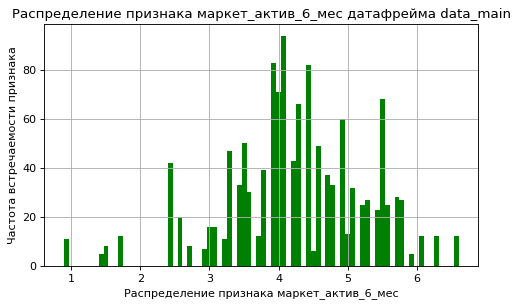

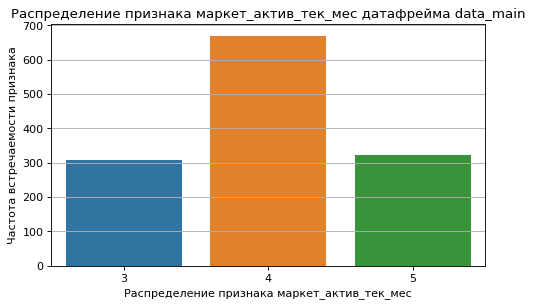

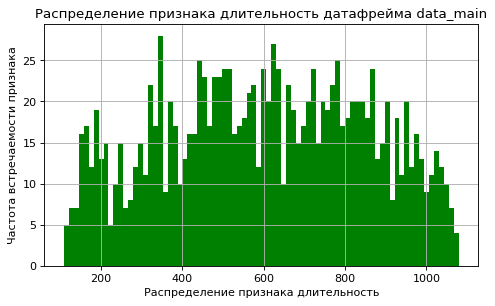

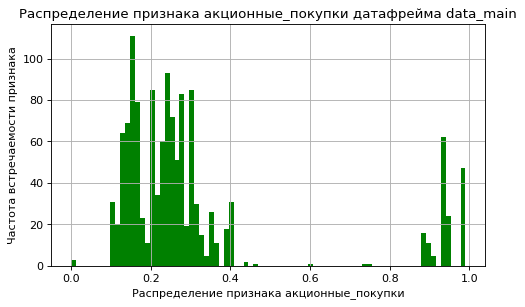

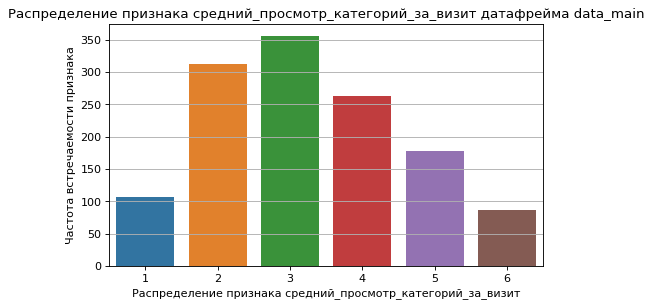

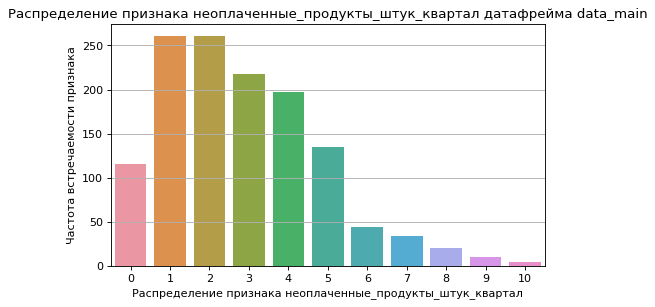

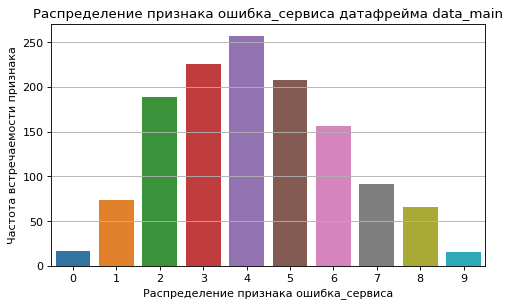

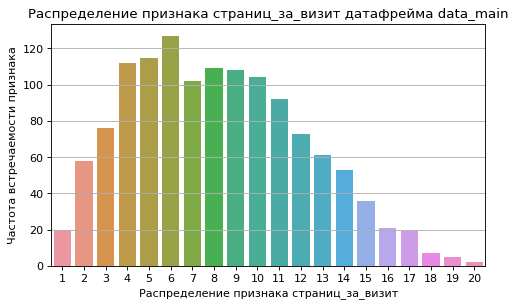

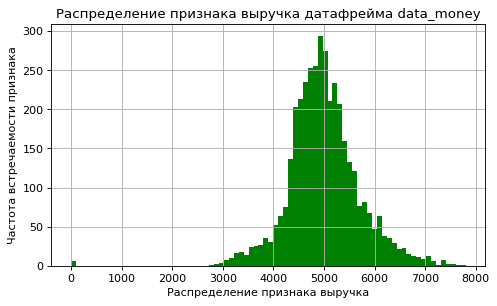

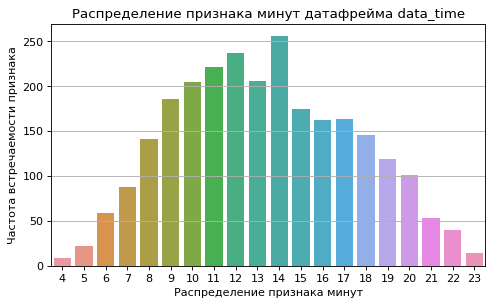

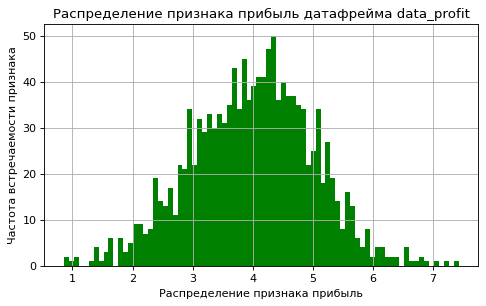

In [26]:
for name, d in dataframes.items():
#выделим только количественные признаки, создав из них список и будем обращаться с элемента 1,
#чтобы не строить графики для столбца id 
    for c in d.select_dtypes(exclude='object').columns.tolist()[1:]:
        plt.figure(figsize = (7,4), dpi = 80)
        plt.grid()
        plt.ylabel('Частота встречаемости признака')
        plt.xlabel(f'Распределение признака {c}')
        plt.title(f'Распределение признака {c} датафрейма {name}')
        if (d[c].dtype == 'int64') and (len(d[c].unique()) < 30):
            sns.countplot(data = d, x=c)
            plt.ylabel('Частота встречаемости признака')
            plt.xlabel(f'Распределение признака {c}')
            plt.show()
        else:
            plt.hist(d[c], bins = 80, color = 'green')
            plt.show() 

Дополнительно посмотрим на общую суммы выручки и времени, проведенного на сайте, по месяцам

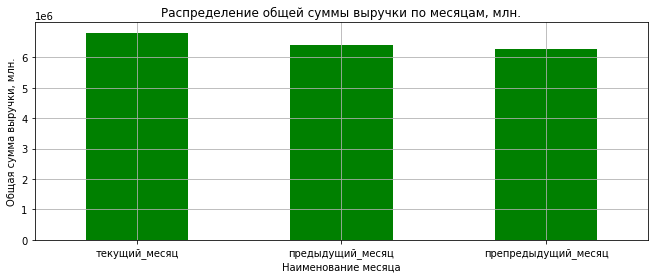

In [27]:
data_money.pivot_table(index = 'период', values=('выручка'), aggfunc={'sum'}).sort_values(by='sum',ascending=False).\
plot(kind='bar',color='green', figsize=(11,4), grid = True, legend = False)
plt.xlabel('Наименование месяца')
plt.ylabel('Общая сумма выручки, млн.')
plt.title('Распределение общей суммы выручки по месяцам, млн.')
plt.yticks(np.arange(0, 7000000, 1000000))
plt.xticks(rotation=0)
plt.show()

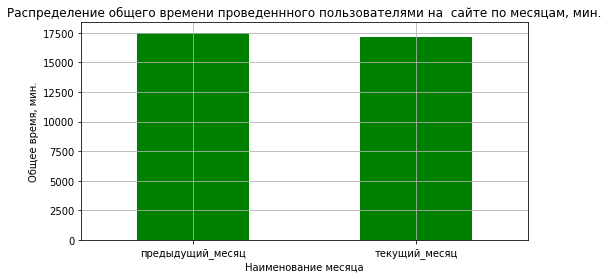

In [28]:
data_time.pivot_table(index = 'период', values=('минут'), aggfunc={'sum'}).sort_values(by='sum',ascending=False).\
plot(kind='bar',color='green', figsize=(8,4), grid = True, legend = False)
plt.xlabel('Наименование месяца')
plt.ylabel('Общее время, мин.')
plt.title('Распределение общего времени проведеннного пользователями на  сайте по месяцам, мин.')
plt.xticks(rotation=0)
plt.show()

Полученные графики показывают:
 - большая часть признаков имеет нормальное распределение без ярко выраженных выбросов
 - самое часто встречающееся значение маркетинговых коммуникаций компаний и для периода в 1 месяц и в 6 месяцев составляет около 4
 - нет пользователей, зарегистрировавшихся менее чем 110 дней назад, что действительно может говорить о том, что об интернет магазине знают уже многие пользователи и новых клиентов найти тяжело, есть пользователи, которые зарегистрированы более 3 лет
 - доля акционных товаров разбита на два диапазона: 10%-40% и 90%-99% от общего числа покупаемых товаров. В первый диапазон входит подавляющее большинство покупателей с пиком в районе 15%. В остальные диапазоны, включа 0%, входит оччень малое число покупателей. Интересно посмотреть, как доля покупок акционных товаров связана с маркетинговыми рассылками.
 - самое частое количество просматриваемых категорий за визит составляет 3
 - количество неоплаченных продуктов в в корзине за квартал в среднем составляет низкое количество - от 1.5 до 2, что может говорить о том, что покупатели дожидаются небольшой скидки и в любом случае покупают большинство товаров, отложенных в корзине, но точно о таком можно говорить только после проверки применения дополнительных скидок к товаров после добавления их в корзину. Также это может говорить о том, что товар по цене все-таки подходить покупателям после проверки с другими сервисами и поэтому покупатель оплачивает товары в корзине. Также наблюдается, что частота встречаемости неоплаченных товаров больше 5 резко падает и к 10 товарам становится близкой 0.
 - среднее кол-во ошибок сервиса равняется 4, наибольшее значение равно 8.
 - наиболее часто покупатели смотрят 6 страниц с товарами, но есть уникальное меньшинство, которые могут пролистать до 20 страниц с товарами
 - самое частое значение выручки в районе 5000, есть небольшой выброс в 0 из-за нескольких пользователей, которые не совершали покупки, этих пользователей мы не будем учитывать при отборе данных для модели, так как наша задача удержание активных пользователей. Если учитывать, что значение прибыли представлено в тысячах, то в среднем за месяц прибыль от общей выручки составляет около 80%, что является высоким показателем.
 - больше всего пользователи в среднем в месяц проводят на сайте в районе 14 минут.
 - большее всего выручки было получено в текущем месяце
 - в предыдущем месяце пользователи немного больше провели в общей сумме на сайте, чем в текущем месяце.

Теперь посмотрим на распределение категориальных признаков датафреймов

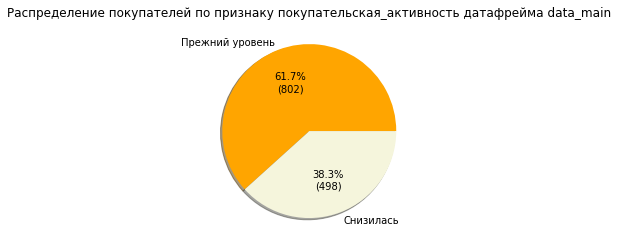

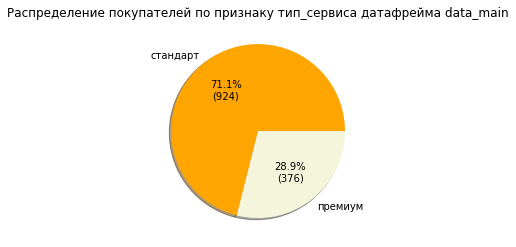

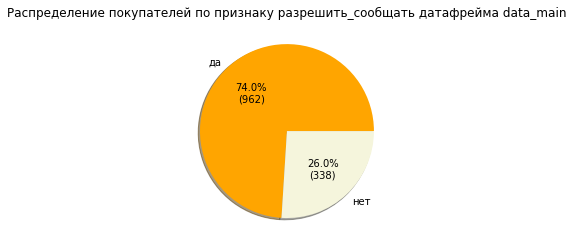

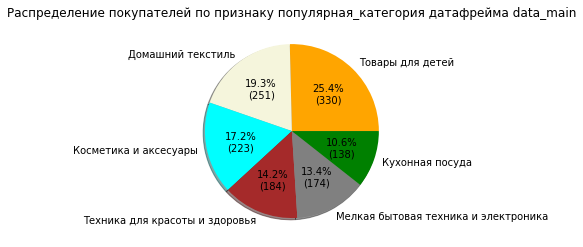

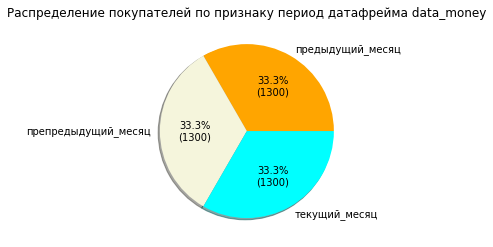

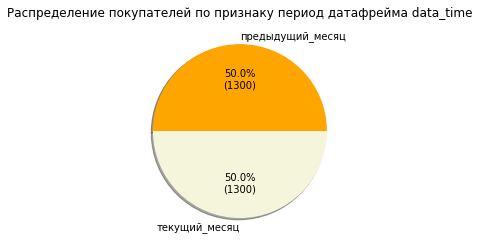

In [29]:
#добавим сразу свой набор цветов для графиков
colors = ("orange", "beige","cyan", "brown","grey", "green")
#используем dataframes.items() для отображения имен датафреймов из ключей словаря
for name, d in dataframes.items():
#выделим только категориальные признаки, создав из них список
    for c in d.select_dtypes(include='object').columns.tolist(): 
        d.pivot_table(index = c, values = 'id', aggfunc={'count'}).sort_values(by= 'count', ascending = False).\
                    plot(kind = 'pie', y = 'count',figsize = (6,4), legend = False, shadow=True,\
#добавим lambda функцию для отображения и процентов и кол-ва точного каждой группы, в f строке в первые фигурные ковычки просто
#выводится x - это отображения в процентах каждой группы в параметре autopct по умолчанию, а во вторых фигурных скобках добавим
#вычисление через проценты количества в каждой группе, используя общее кол-во строк в таблице, этот метод точен только
#до 3 знака после запятой в отображении элементов
                        autopct= lambda x: '{:.1f}%\n({:.0f})'.format(x,(x* d.shape[0]/100)), colors = colors)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(f'Распределение покупателей по признаку {c} датафрейма {name}')
        plt.show()
        

Полученные диаграммы показывают следующее:

- большая часть покупателей осталась на прежнем уровне активности, наблюдается небольшой дисбаланс целевого признака:
    - 61,7 % (802 покупателя) остались на прежнем уровне активности;
    - 38,3 % (498 покупателей) снизили активность;
- большинство пользователей предпочитают подписку стандарт - 71.7% (924 покупателя);
- большинство пользователей разрешили получать рекламные расслыки - 74% (962покупателя);
- рейтинг самых популярных категорий товаров у покупателей получился следующим:
  - товары для детей - 25.4%
  - домашний текстиль - 19.3%
  - косметика и аксессуары - 17.2% 
  - техника для красоты и здоровья - 14.2%
  - мелкая бытовая техника и электроника - 13.4%
  - кухонная посуда - 10.6%
- выборка покупателей по периодам получения выручки с них дана равномерная: данные представлены для всех 1300 покупателей в текущем, предыдущем и препредыдущем месяцах (так как в данном датафрейме нет строк с явными дубликатами), при объединении таблиц проверим, что клиенты соответствуют клиентам из датафрейма `data_main`
- время, проведененное в текущем месяце и предыдущем также преставлены для каждого из 1300 клиентов датафрейма `data_main`, при объединении таблиц проверим, что клиенты соответствуют клиентам из датафрейма `data_main`

### Отбор активных пользователей

Следующим шагом необходимо оставить в исследуемой группе только тех пользователей, покупательская активность которых составляет 3 месяца и больше. Так как в нашем датафрейме `data_money` сведения о совершенных покупках представлены как раз за 3 месяца: `текущий_месяц`,`предыдущий_месяц`,`препредыдущий_месяц`, то нам необходимо оставить только тех пользователей, которые совершали покупки регулярно каждый месяц.

Составим список из `id` активных пользователей, которые регулярно совершали покупки в течении 3 месяцев из датафрейма `data_money`

In [30]:
#составляем списки True/False для каждого месяца под критерий выручка > 0, после чего оставляем только такие id
active_clients = data_money.loc[data_money['id'].isin(data_money.loc[(data_money['период'] == 'текущий_месяц') & (data_money['выручка'] > 0), 'id']) &\
               data_money['id'].isin(data_money.loc[(data_money['период'] == 'предыдущий_месяц') & (data_money['выручка'] > 0), 'id']) &\
                data_money['id'].isin(data_money.loc[(data_money['период'] == 'препредыдущий_месяц') & (data_money['выручка'] > 0), 'id']), 'id'].unique()

Можно было еще выбрать такой же перечень `id` при помощи более короткого решения, но такой вариант подходит только для нашего датасета и только для такой поставленной задачи, если бы задача отличалась, то этот вариант не был бы не такой гибкий к выбору точных названий месяцев

In [31]:
data_money.query('выручка > 0')['id'].value_counts().loc[lambda x : x == 3].index

Int64Index([215349, 215756, 215792, 215790, 215788, 215786, 215784, 215782,
            215780, 215778,
            ...
            216225, 216223, 216221, 216219, 216217, 216215, 216213, 216211,
            216209, 216207],
           dtype='int64', length=1297)

Оставим в исследуемых данных только активных пользователей и создадим для них новый датафрейм `data_active` 

In [32]:
data_active = data_main.query('id.isin(@active_clients)').reset_index(drop=True)
display(data_active.head(10))
print(f'Размерность датасета {data_active.shape}')

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
5,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
6,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
7,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
8,215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4
9,215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7


Размерность датасета (1297, 13)


**Полученные графики и статистики для количественных признаков показали следующие результаты:**

 - большая часть признаков имеет нормальное распределение без ярко выраженных выбросов
 - самое часто встречающееся значение маркетинговых коммуникаций компаний и для периода в 1 месяц и в 6 месяцев составляет около 4
 - нет пользователей, зарегистрировавшихся менее чем 110 дней назад, что действительно может говорить о том, что об интернет магазине знают уже многие пользователи и новых клиентов найти тяжело, есть пользователи, которые зарегистрированы более 3 лет
 - доля акционных товаров разбита на два диапазона: 10%-40% и 90%-99% от общего числа покупаемых товаров. В первый диапазон входит подавляющее большинство покупателей с пиком в районе 15%. В остальные диапазоны, включа 0%, входит оччень малое число покупателей.
 - самое частое количество просматриваемых категорий за визит составляет 3
 - количество неоплаченных продуктов в в корзине за квартал в среднем составляет низкое количество - от 1.5 до 2, что может говорить о том, что покупатели дожидаются небольшой скидки и в любом случае покупают большинство товаров, отложенных в корзине, но точно о таком можно говорить только после проверки применения дополнительных скидок к товаров после добавления их в корзину. Также это может говорить о том, что товар по цене все-таки подходить покупателям после проверки с другими сервисами и поэтому покупатель оплачивает товары в корзине. Также наблюдается, что частота встречаемости неоплаченных товаров больше 5 резко падает и к 10 товарам становится близкой 0.
 - среднее кол-во ошибок сервиса равняется 4, наибольшее значение равно 8.
 - наиболее часто покупатели смотрят 6 страниц с товарами, но есть уникальное меньшинство, которые могут пролистать до 20 страниц с товарами
 - самое частое значение выручки в районе 5000, есть небольшой выброс в 0 из-за нескольких пользователей, которые не совершали покупки, этих пользователей мы не будем учитывать при отборе данных для модели, так как наша задача удержание активных пользователей. Если учитывать, что значение прибыли представлено в тысячах, то в среднем за месяц прибыль от общей выручки составляет около 80%, что является высоким показателем.
 - больше всего пользователи в среднем в месяц проводят на сайте в районе 14 минут.
 - большее всего выручки было получено в текущем месяце
 - в предыдущем месяце пользователи немного больше провели в общей сумме на сайте, чем в текущем месяце.

**Полученные диаграммы для категориальных признаков показывают следующее:**

- большая часть покупателей осталась на прежнем уровне активности, наблюдается небольшой дисбаланс целевого признака:
    - 61,7 % (802 покупателя) остались на прежнем уровне активности;
    - 38,3 % (498 покупателей) снизили активность;
- большинство пользователей предпочитают подписку стандарт - 71.7% (924 покупателя);
- большинство пользователей разрешили получать рекламные расслыки - 74% (962 покупателя);
- рейтинг самых популярных категорий товаров у покупателей получился следующим:
  - товары для детей - 25.4%
  - домашний текстиль - 19.3%
  - косметика и аксессуары - 17.2% 
  - техника для красоты и здоровья - 14.2%
  - мелкая бытовая техника и электроника - 13.4%
  - кухонная посуда - 10.6%
- выборка покупателей по периодам получения выручки с них дана равномерная: данные представлены для всех 1300 покупателей в текущем, предыдущем и препредыдущем месяцах (так как в данном датафрейме нет строк с явными дубликатами), при объединении таблиц проверим, что клиенты соответствуют клиентам из датафрейма `data_main`
- время, проведененное в текущем месяце и предыдущем также преставлены для каждого из 1300 клиентов датафрейма `data_main`, при объединении таблиц проверим, что клиенты соответствуют клиентам из датафрейма `data_main`

Также для дальнейшего исследования были отобраны активные пользователи, которые регулярно в течении трех месяцев совершали покупки.

## Объединение таблиц

Для дальнейшего моделирования нам необходимо объединить данные `data_active`, `data_money` и `data_time` в новый датафрейм `data_all`. Так как данные о выручке в `data_money` и времени проведения на сайте в `data_time` представлены сразу для всех месяцев в одном столбце, то для создания корректных входных признаков нам небходимо данные за каждый месяц о выручке и времени проведения на сайте разделить по разным столбцам в итоговом датафрейме (отдельные столбцы для каждой характеристики для каждого месяца).

Для начала добавим данные о выручке каждого месяца в отдельный столбец

In [33]:
data_all = data_active.copy()

for d in data_money['период'].unique():
    data_all = data_all.merge(data_money.loc[data_money['период'] == d, ['id','выручка']], on = 'id', how = 'inner').\
        rename(columns = {'выручка': d.split('_')[0]+'_выручка'})

Теперь добавим данные о времени проведения на сайте, также для каждого месяца добавим свой отдельный столбец

In [34]:
for d in data_time['период'].unique():
    data_all = data_all.merge(data_time.loc[data_time['период'] == d, ['id','минут']], on = 'id', how = 'inner').\
        rename(columns = {'минут': d.split('_')[0]+'_минут'})

Посмотрим на получившуюся таблицу

In [35]:
data_all.head(15)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,препредыдущий_выручка,текущий_выручка,предыдущий_выручка,текущий_минут,предыдущий_минут
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0,10,12
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0,13,11
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,5807.5,11,8
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,4738.5,10,10
5,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,4503.0,5869.6,5685.0,12,11
6,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,4749.0,3772.6,3263.0,10,12
7,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4433.0,4566.4,4146.5,7,6
8,215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,4727.0,4209.5,3488.0,10,14
9,215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7,5555.0,5834.9,5304.5,6,9


Проверим итоговую таблицу на наличие пропусков после объединения

In [36]:
data_all.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
препредыдущий_выручка                  0
текущий_выручка                        0
предыдущий_выручка                     0
текущий_минут                          0
предыдущий_минут                       0
dtype: int64

Также проверим, что данные добавились корректно к нужным `id`

In [37]:
print('Данные таблицы после объединения')
display(data_all.query('id in (215353,215355,215363)'))
print('Исходные данные до объединения')
for d in data_money,data_time:
    display(d.query('id in (215353,215355,215363)'))

Данные таблицы после объединения


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,препредыдущий_выручка,текущий_выручка,предыдущий_выручка,текущий_минут,предыдущий_минут
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,4738.5,10,10
6,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,4749.0,3772.6,3263.0,10,12
12,215363,Снизилась,стандарт,нет,4.9,4,923,0.29,Товары для детей,6,0,3,1,4633.0,6128.3,6010.0,5,8


Исходные данные до объединения


,id,период,выручка
15,215353,предыдущий_месяц,4738.5
16,215353,препредыдущий_месяц,5124.0
17,215353,текущий_месяц,5388.5
21,215355,текущий_месяц,3772.6
22,215355,препредыдущий_месяц,4749.0
23,215355,предыдущий_месяц,3263.0
45,215363,предыдущий_месяц,6010.0
46,215363,текущий_месяц,6128.3
47,215363,препредыдущий_месяц,4633.0


,id,период,минут
10,215353,предыдущий_месяц,10
11,215353,текущий_месяц,10
14,215355,предыдущий_месяц,12
15,215355,текущий_месяц,10
30,215363,предыдущий_месяц,8
31,215363,текущий_месяц,5


**В результате объединения получена общая таблица, включая данные о выручке и времени проведения на сайте каждого пользователя, разбитые по месяцам.**

## Корреляционный анализ

Построим матрицу корреляции коэффициентов Пирсона для всех количественных признаков для датафрейма `data_all`

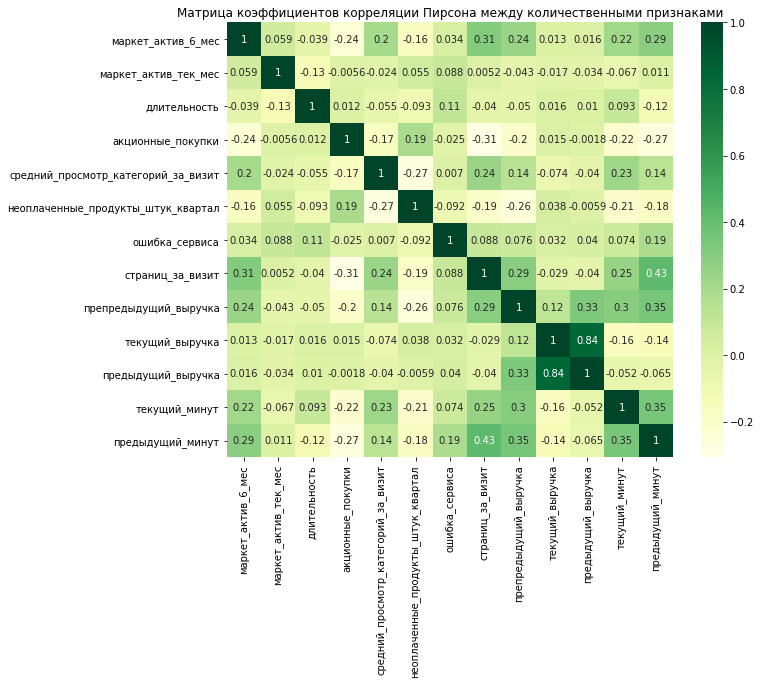

In [38]:
plt.figure(figsize = (10,8))
sns.heatmap(data_all[data_all.select_dtypes(exclude='object').columns.tolist()[1:]].corr(), annot=True, cmap='YlGn')
plt.title('Матрица коэффициентов корреляции Пирсона между количественными признаками')
plt.show()

Дополнительно составим матрицу коэффициентов корреляции для всех признаков. Воспользуемся матрицей корреляции из библиотеки `phik`

Необходимо также создать список с названиями непрерывных признаков `interval_cols` и передать его в `phik_matrix()` для того, чтобы четко обозначить методу названия непрерывных признаков и тем самым повысить точность расчитанных коэффициентов корреляции

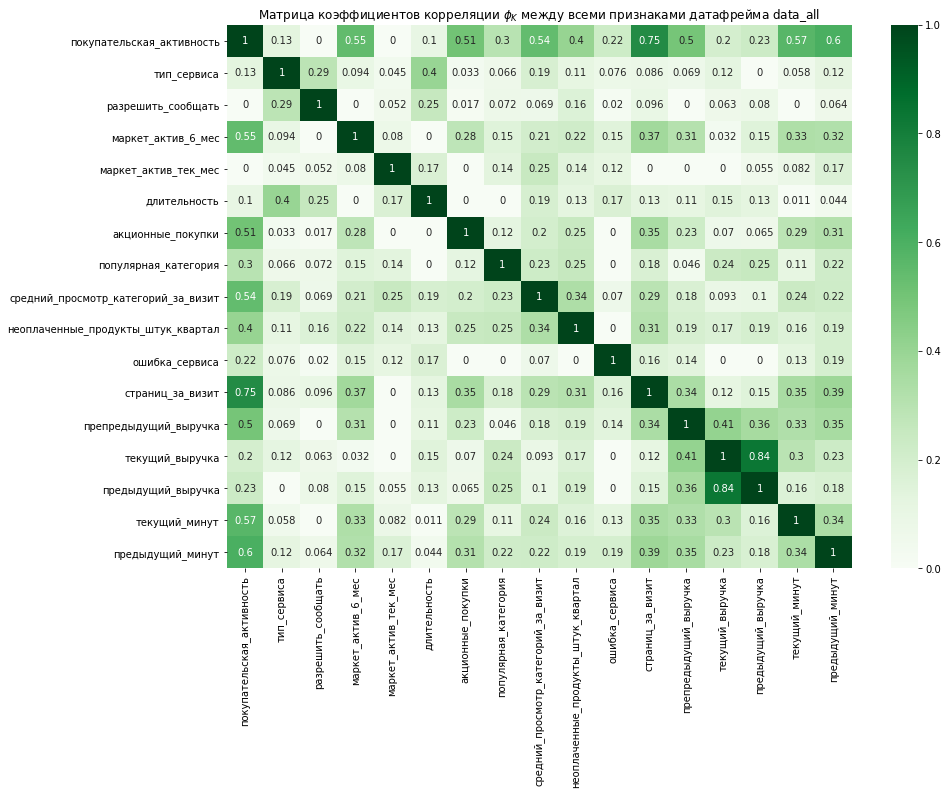

In [40]:
interval_cols = [
    'маркет_актив_6_мес',
    'длительность',
    'акционные_покупки',
    'препредыдущий_выручка',
    'предыдущий_выручка',
    'текущий_выручка'
]

plt.figure(figsize = (14,10))
sns.heatmap(data_all.iloc[:,1:].phik_matrix(interval_cols=interval_cols), annot=True, cmap='Greens')
plt.title(r'Матрица коэффициентов корреляции $\phi_K$ между всеми признаками датафрейма data_all')
plt.show()

**Полученные матрицы корреляции позволяют сделать следующие выводы:**
 - между входными признаками не присутствует мультиколлинеарности. Самая тесная связь между входными признаками наблюдается между `предыдущий_выручка` и `текущий_выручка`, коэффициент корреляции составляет 0.84, удалять входные признаки как было указано в теории при первичной фильтрации лучше те, у которых коэффициент корреляции выше 0.9.
 - есть входны признаки, которые имеют коэффициент корреляции 0 с целевым: `маркет_актив_тек_мес` и `разрешить_сообщать`. Можно будет попробовать при подборе входных признаков для обучения модели убрать эти два признака, может они только мешают более точному обучению модели.
 - самая сильная связь у целевого признака `покупательская_активность`с входным признаком `страниц_за_визит`. 

## Применение пайплайнов

### Подготовка данных при помощи ColumnTransformer

Для начала создадим отдельные списки для столбцов, которые будут масштабироваться и кодироваться разными способами. Категориальные столбцы будем кодировать при помощи OneHotEncoder, так как во всех столбцах данные разделены на 2 группы значений и только столбец `популярная_категория` будем кодировать при помощи OrdinalEncoder для того, чтобы не создавать много лишних столбцов.

In [41]:
ohe_columns = [
    'популярная_категория'
]

ord_columns = [
    'тип_сервиса','разрешить_сообщать'
]

In [42]:
num_columns = ['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'препредыдущий_выручка',
 'текущий_выручка',
 'предыдущий_выручка',
 'текущий_минут',
 'предыдущий_минут'] 

Добавим разделение данных на тренировочную и тестовую выборки, помним, что в данных был дисбаланс в 10%, поэтому добавим параметр stratify = `покупательская активность`, также стандартизируем использование пайплана, поэтому хоть в датасете и не было пропусков, добавим заполнение пропусков при помощи SimpleImputer для полноты обработки и подготовки данных.

In [43]:
#объявляем константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

#делим данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data_all.drop(['id', 'покупательская_активность'], axis=1),
    data_all['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data_all['покупательская_активность']
)

In [44]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков (хоть в данном случае у нас их нет,
#но оставим сразу для использования в будущем) и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OHE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord', OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                    ['нет', 'да']
                ],
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)
print(data_preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['популярная_категория']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  Or...
                                 ['тип_сервиса', 'разрешит

**Создан пайплайн `data_preprocessor` для подготовки данных**

### Поиск лучшей модели и выбор метрики

Для поиска лучшей модели  из изученных для начала добавим модели в качестве гиперпараметров и добавим инструмент для  автоматизированного поиска гиперпараметров, так как пока гиперпараметры самих моделей мы не задаем, то будем использовать GridSearchCV

Так как метрика ROC-AUC оценивает качество решений модели в наиболее общем виде, учитывая все возможные пороговые значения и не зависит от того, какой порог мы выберем и поэтому является самой общей оценкой итогов работы модели, то для оценивания качества работы нашей модели будем использовать именно ее.

Модель SVC возвращает метки класса при помощи `predict()`, для возможности получения вероятностей `predict_proba()` укажем для модели параметр `probability=True`

In [45]:
# создаём итоговый пайплайн: подготовка данных и модель, прописываем любую модель
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

#создаем словарь для перебора моделей в качестве гиперпараметров, добавляя их к шагу models пайплайна
param_grid = {
    'models' : [
        DecisionTreeClassifier(random_state=RANDOM_STATE),
        KNeighborsClassifier(),
        SVC(random_state=RANDOM_STATE, probability=True),
        LogisticRegression(random_state=RANDOM_STATE)
    ]
} 

In [46]:
#добавляем инструмент для автоматизированного подбора гиперпараметров (лучшего масштабирования и модели)
#для использования дополнительных ядер указываем параметр n_jobs =-1
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print('Метрика ROC-AUC для лучшей модели при кросс-валидации:\n', grid.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
           

**В качестве метрики оценивания работы модели была выбрана метрика ROC-AUC.
При одном типе масштабирования MinMaxScaler и без заданных гиперпараметров у моделей лучше всего проявила себя модель SVC с ядром 'rbf' по умолчанию. Метрика ROC-AUC на тренировочных данных получилась около 0.9**

### Подбор гиперпараметров модели и масштабирования

#### Несколько вариантов масштабирования

Теперь используем несколько вариантов масштабирования, добавив их в словарь с гиперпараметрами, перепишем блок из предыдущего пункта

In [47]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    'models' : [
        DecisionTreeClassifier(random_state=RANDOM_STATE),
        KNeighborsClassifier(),
        SVC(random_state=RANDOM_STATE,probability=True),        
        LogisticRegression(random_state=RANDOM_STATE,solver='liblinear')
    ]
} 

#добавляем инструмент для автоматизированного подбора гиперпараметров (масштабирование и модели)
#для использования дополнительных ядер указываем параметр n_jobs =-1
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train) 
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print('Метрика ROC-AUC для лучшей модели, полученная при кросс-валидации:\n', grid.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
           

**Благодаря использованию StandardScaler удалось увеличить метрику с 0.90 до 91.5 при кросс-валидации**

#### Подбор гиперпараметров для моделей

Теперь добавим по несколько гиперпараметров моделям, переписав код из предыдущего раздела и добавив каждой модели свой словарь с гиперпараметрами. Также добавим несколько ядер для модели SVC для сравнения и помимо параметра C добавим еще параметр Y в словарь. Также для ускорения подбора гиперпараметров будем использовать RandomizedSearchCV, так как если поиск при помощи GridResearchCV будет слишком долгим. А в OptunaResearchCV нельзя передавать список словарей. Количество итераций зададим 10.

In [48]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_features': range(2,5),
        'models__max_depth': range(2,5),
        'models__min_samples_split' : range(2,6),
        'models__min_samples_leaf' : range(1,3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,14),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC() с разными ядрами
    #для получения меток вероятностей для подсчета в метрике ROC-AUC используем параметр probability = True
    {
        'models': [SVC(probability = True,
            random_state=RANDOM_STATE
        )],
        'models__kernel':['rbf', 'sigmoid', 'linear'],
        'models__C': range(1,4),
        'models__gamma': range(1,4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC() с ядром полинома,из-за гиперпараметра degree, который есть только у этого ядра, 
    #вынесен в отдельный словарь
    {
        'models': [SVC(kernel = 'poly', probability = True, degree = 2,
            random_state=RANDOM_STATE
        )],
        'models__C': range(1,4),
        'models__gamma': range(1,4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

# запускаем таймер для проверки длительности поиска
start = time.time()

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
#количество итераций задаем 10
    n_iter=10
)
randomized_search.fit(X_train, y_train)

randomized_search_time = time.time() - start
print('Характеристики при RandomizedSearchCV')
print(f'Время подбора гиперпараметров для моделей: {randomized_search_time}')


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика ROC-AUC для лучшей модели, полученная при кросс-валидации:', randomized_search.best_score_)

Характеристики при RandomizedSearchCV
Время подбора гиперпараметров для моделей: 3.174440622329712
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
       

Метрика ROC-AUC при кросс-валидации ухудшилась, рендомизированный поиск хоть и смог быстро подобрать параметры - около 3 секунд, но не смог подобрать гиперпараметры для моделей лучше, чем это сделал GridResearchCV вообще без гиперпараметров, поэтому попробуем оставить лишь некоторые гиперпараметры для моделей и иcпользовать и RandomizedSearchCV и GridResearchCV одновременно, сравнив показатели качества и времени:
- у модели `SVC()` оставлено только ядро `rbf` и убран гиперпараметр Y (гамма)
- у модели `DecisionTreeClassifier()` убран параметр `models__max_features`

In [49]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__min_samples_split' : range(2,6),
        'models__min_samples_leaf' : range(1,3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,14),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    #для получения меток вероятностей для подсчета в метрике ROC-AUC используем параметр probability = True
    {
        'models': [SVC(probability = True,
            random_state=RANDOM_STATE
        )],
        'models__kernel':['rbf'],
        'models__C': range(1,4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

# запускаем таймер для проверки длительности поиска при RandomizedSearchCV
start = time.time()

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
#количество итераций задаем 10
    n_iter=10
)
randomized_search.fit(X_train, y_train)

randomized_search_time = time.time() - start
print('Характеристики при RandomizedSearchCV')
print(f'Время подбора гиперпараметров для моделей: {randomized_search_time}')


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика ROC-AUC для лучшей модели, полученная при кросс-валидации:', randomized_search.best_score_)


# запускаем таймер для проверки длительности поиска при GridSearchCV
start = time.time()

grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train) 

grid_search_time = time.time() - start
print('\n\nХарактеристики при GridSearchCV')
print(f'Время подбора гиперпараметров для моделей: {grid_search_time}')

print('Лучшая модель и её параметры на тренировочной выборке:\n\n', grid.best_estimator_)
print('Метрика ROC-AUC для лучшей модели, полученная при кросс-валидации:\n', grid.best_score_)

Характеристики при RandomizedSearchCV
Время подбора гиперпараметров для моделей: 1.5338754653930664
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
      

По итогам сравнения двух методов автоматизированного подбора гиперпараметров, ожидаемо `GridSearch()` подобрал лучшую модель с лучшими гиперпараметрами, метрика ROC-AUC = 0.915 говорит о том, что у модели низкое смещение. Посчитаем метрику ROC-AUC для тестовой выборки. 

In [50]:
# проверяем работу лучшей модели на тестовой выборке
# рассчитываем прогнозные метки на тестовых данных
y_test_proba = grid.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC лучшей модели на тестовой выборке: {roc_auc_score(y_test, y_test_proba)}')

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9175493500240732


Метрика увеличилась на 0.002 по сравнению с результатом, полученным на кросс-валидации тренировочной выборки, что говорит о том, что у модели низкий разброс.

При сравнении двух вариантов автоматизированного подбора гиперпараметров получились следующие результаты:
 - RandomizedSearchCV подобрал лучшую модель за 1.6 сек -  KNeighborsClassifier(n_neighbors=13), метрика ROC-AUC при кросс-валидационной проверке  на тренировочной выборке получилась 0.908, 
 - GridSearchCV перебрал все указанные нами варианты гиперпараметров за 25.5 сек и нашел модель, которая проявила себя лучше всех при кросс-валидационной проверке  на тренировочной выборке: SVC(kernel = 'rbf', C=1), метрика ROC-AUC оказалась 0.915, при проверке на тестовой выборке метрика немного увеличилась до 0.917.
 - StandardScaler в качестве масштабирования для количественных признаков в обоих случаях оказался лучшим
 
**По итогам автоматизированного поиска лучшей модели и лучших гиперпараметров лучшей оказалась модель, предсказанная GridSearchCV:  SVC(kernel = 'rbf', C=1)**

Осталось проверить модель на "адекватность", сравнив ее результаты с результатами работы модели `DummyClassifier`

### Проверка модели на адекватность

Осталось сравнить результаты, предсказанные с помощью нашей лучшей модели, с результатами константной модели `DummyClassifier()`. Эта модель всегда присваивает объектам мажорный класс, в нашей случае класс активности 'прежний уровень'. В параметре `strategy` оставим стратегию по умолчанию `prior` для того, чтобы метод `predict_proba()` вернул нам именно процентные метки вероятностей для корректного получения значения метрики ROC-AUC. Сравним и общее количество правильных прогнозов простой метрикой `accuracy` и нашу выбранную метрику `roc_auc_score` у двух моделей, показывающую обобщенную работу модели при всех возможных порогах вероятности.

Выведем метрики `accuracy` и `roc_auc_score` для нашей лучшей модели `grid.best_estimator_`

In [51]:
#получаем метрики accuracy и roc_auc_score нашей лучшей модели на тестовой выборке
print('Метрики для лучшей модели')
print(f'Метрика accuracy на тестовой выборке: {round(accuracy_score(y_test, grid.best_estimator_.predict(X_test)),3)}')
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba),3)}')

Метрики для лучшей модели
Метрика accuracy на тестовой выборке: 0.908
Метрика ROC-AUC на тестовой выборке: 0.918


Теперь преобразуем данные для обучения в `DummyClassifier`

In [52]:
#подгатавливаем данные для обучения в DummyClassifier
X_train_transform = pd.DataFrame(
    grid.best_estimator_.named_steps['preprocessor'].transform(X_train),
    columns = grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()    
) 

X_test_transform = pd.DataFrame(
    grid.best_estimator_.named_steps['preprocessor'].transform(X_test),
    columns = grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()    
) 

Объявим модель `DummyClassifier`, обучим ее на преобразованных данных и получим метрики `accuracy` и `roc_auc_score` для тестовой выборки

In [53]:
#инициилизируем модель DummyClassifier
dummy_model = DummyClassifier(random_state=RANDOM_STATE,strategy='prior')
dummy_model.fit(X_train_transform, y_train)

#оценка константной модели
print(f'Метрика accuracy на тестовой выборке: {round(accuracy_score(y_test, dummy_model.predict(X_test_transform)),3)}')
y_test_proba_dummy = dummy_model.predict_proba(X_test_transform)[:,1]
print(f'Метрика ROC-AUC для DummyClassifier на тестовой выборке: {roc_auc_score(y_test, y_test_proba_dummy)}')

Метрика accuracy на тестовой выборке: 0.618
Метрика ROC-AUC для DummyClassifier на тестовой выборке: 0.5


**Наша лучшая модель справилась с проверкой на адекватность и показала метрики намного выше, чем у константной модели DummyClassifier()**

**При использовании пайплайнов для подбора лучшей модели были проделаны следующие шаги и получены следующие результаты**
- создан итоговый пайплайн, включающий:
  - подготовку данных:
   - использование двух методов кодирования категориальных признаков: при помощи OneHotEncoder() и OrdinalEncoder()
   - использование нескольких вариантов масштабирования количественных признаков: MinMaxScaler(), StandardScaler() и вариант без маштабирования
  - перебор моделей KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC() с их гиперпараметрами при помощи инструментов автоматизированного подбора GridSearchCV() и RandomizedSearchCV().
- для оценивания качества получаемых моделей была выбрана метрика ROC-AUC, так как она оценивает качество решений модели в наиболее общем виде, учитывая все возможные пороговые значения и не зависит от того, какой порог мы выберем и поэтому является самой общей оценкой итогов работы модели
- инструменты автоматизированного подбора гиперпараметров для моделей показали следующие результаты:
  - RandomizedSearchCV подобрал лучшую модель за 1.6 сек -  KNeighborsClassifier(n_neighbors=13), метрика ROC-AUC при кросс-валидационной проверке на тренировочной выборке получилась 0.908
  - GridSearchCV перебрал все указанные нами варианты гиперпараметров за 25.5 сек и нашел модель, которая проявила себя лучше всех при кросс-валидационной проверке на тренировочной выборке: SVC(kernel = 'rbf', C=1), метрика ROC-AUC оказалась 0.915, на тренировочной выборке метрика немного увеличилась до 0.917.
  - StandardScaler в качестве масштабирования для количественных признаков в обоих случаях оказался лучшим
  
**Лучшей моделью оказалась модель SVC() с ядром kernel = 'rbf' и с коэффициентом C=1, масштабирование количественных признаков - StandardScaler(), также она прошла проверку на адекватность и показала метрики намного выше, чем у константной модели**

## Анализ важности признаков

### Анализ важности при помощи permutation_importance

Так как наша лучшая модель не имеет встроенного инструмента для отображения важности признаков, как `coef_[0]` у линейной регрессии или `feature_importances_` у дерева решений, то воспользуемся `permutation_importance`, который покажет, насколько изменится метрика, если поочерёдно перемешать значения в каждом входном признаке модели. Если при перемешивании значение метрики не поменяется, то значит такой признак менее важен. Для корретной работы в `permutation_importance` передадим собственную функцию для расчета стандартной метрики roc_auc_score, которая будет просчитываться на каждом перемешивании каждого последующего входного признака и возвращать результат метрики и сравнивать значение метрики с первоначальным, посчитанным при нормальных расположениях значений в данных.  

In [54]:
#функция для стандартного просчета метрики roc_auc_score, необходима для корректной работы permutation_importance
def custom_roc_auc(model, X, y):
    y_proba = model.predict_proba(X)[:,1]
    score = roc_auc_score(y, y_proba)
    return score

result = permutation_importance(grid.best_estimator_, X_test, y_test, scoring = custom_roc_auc) 

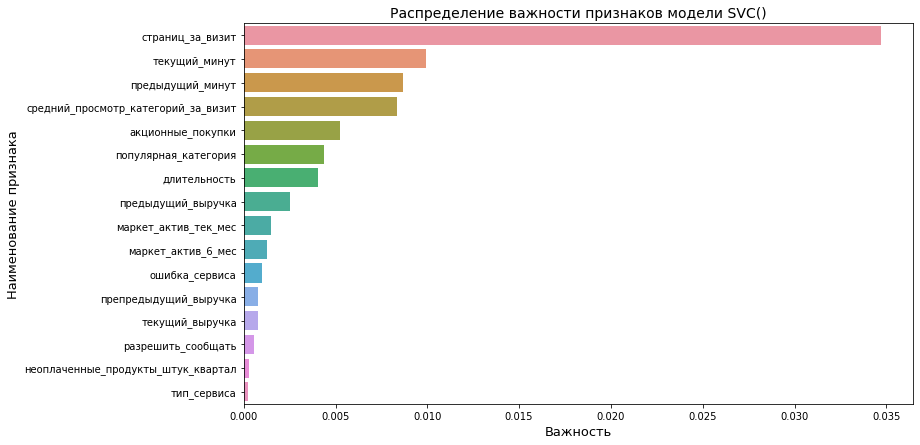

In [55]:
#сооздадим датафрейм из названий столбцов в тренировочной выборке и абсолютных значений посчитанных коэффициентов важности
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': abs(result['importances_mean'])})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

#рисуем график важности признаков
plt.figure(figsize=(12, 7))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance)
plt.xlabel('Важность', fontsize = 13)
plt.ylabel('Наименование признака', fontsize = 13)
plt.title('Распределение важности признаков модели SVC()', fontsize = 14)
plt.show()

**Полученный график показывает, что в тройке лидеров по важности признаков находятся:**
 - `страниц_за_визит`
 - `предыдущий минут`
 - `текущий_минут`

Меньшую важность имеют признаки `разрешить_сообщать` и `тип_сервиса`

### Анализ важности при помощи SHAP

Следующим шагом попробуем проанализировать важность признаков при помощи SHAP. Нам необходимо сделать следующее: 
- взять обученную лучшую модель из пайплайна
- взять шаг с предобработкой данных из пайплайна, обработать тестовую выборку
- взять имена предобработанных столбцов и создать датафрейм из тестовых обработанных данных и имен столбцов
- посчитать важность признаков с помощью значений Шепли.

Возьмем из итогового пайплайна шаг с моделью. Чтобы была получена именно лучшая модель, то обратимся через grid, который и нашел эту лучшую модель

In [56]:
best_model_SVC = grid.best_estimator_.named_steps['models']
best_model_SVC

SVC(C=1, probability=True, random_state=42)

Следующим шагом обратимся к шагу пайплайна 'preprocessor', который выполняет полную предобработку данных и преобразуем выборки и подготовим. Также возьмем из этого шага наименования столбцов и объединим в общий датафрейм

In [57]:
#подгатавливаем данные для использования в Explainer
X_train_transform = pd.DataFrame(
    grid.best_estimator_.named_steps['preprocessor'].transform(X_train),
    columns = grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()    
) 

X_test_transform = pd.DataFrame(
    grid.best_estimator_.named_steps['preprocessor'].transform(X_test),
    columns = grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()    
) 

Теперь попробуем разные методы SHAP

Попробуем метод Explainer, подходящий к большинству моделей. Чтобы не получать кучу предупреждений об отсутствии названий столбцов у модели используем заново обученную модель с лучшими гиперпараметрами 

In [58]:
model_SVC_duplicate = SVC(C=3, probability=True, random_state=42).fit(X_train_transform,y_train)
model_SVC_duplicate

SVC(C=3, probability=True, random_state=42)

Считаем значение Шепли

In [59]:
explainer = shap.Explainer(model_SVC_duplicate.predict_proba,X_test_transform)
shap_values = explainer(X_test_transform)

#получаем только метки для положительного класса
shap_values = shap_values[...,1]

PermutationExplainer explainer: 326it [04:32,  1.17it/s]                         


Строим графики при помощи Explainer

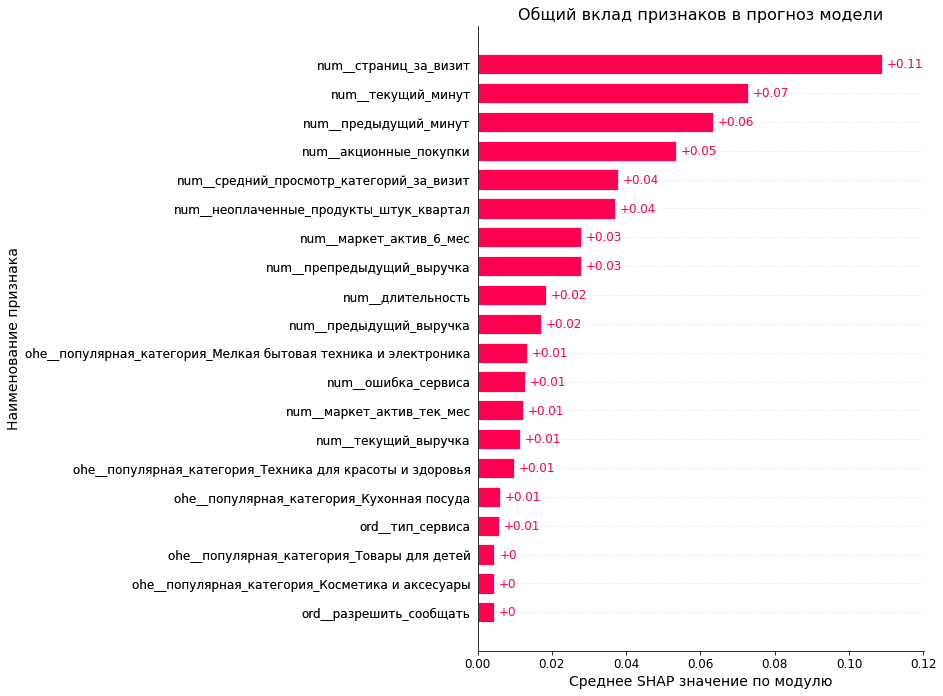

In [60]:
#объявляем график до подписания осей и установки размеров и указываем show=False, 
#чтобы можно дополнительно было настроить график после его создания.
shap.plots.bar(shap_values, max_display = None,show=False)

#объявляем фигуру и объекты осей
fig, ax = plt.gcf(), plt.gca()

#размер наименования подписи каждого признака
ax.tick_params(labelsize=12)

#подписи осей и наименования графика
ax.set_ylabel("Наименование признака", fontsize=14)
ax.set_xlabel("Среднее SHAP значение по модулю", fontsize=14)
ax.set_title('Общий вклад признаков в прогноз модели', fontsize=16)

#отображение конечного графика
plt.show()

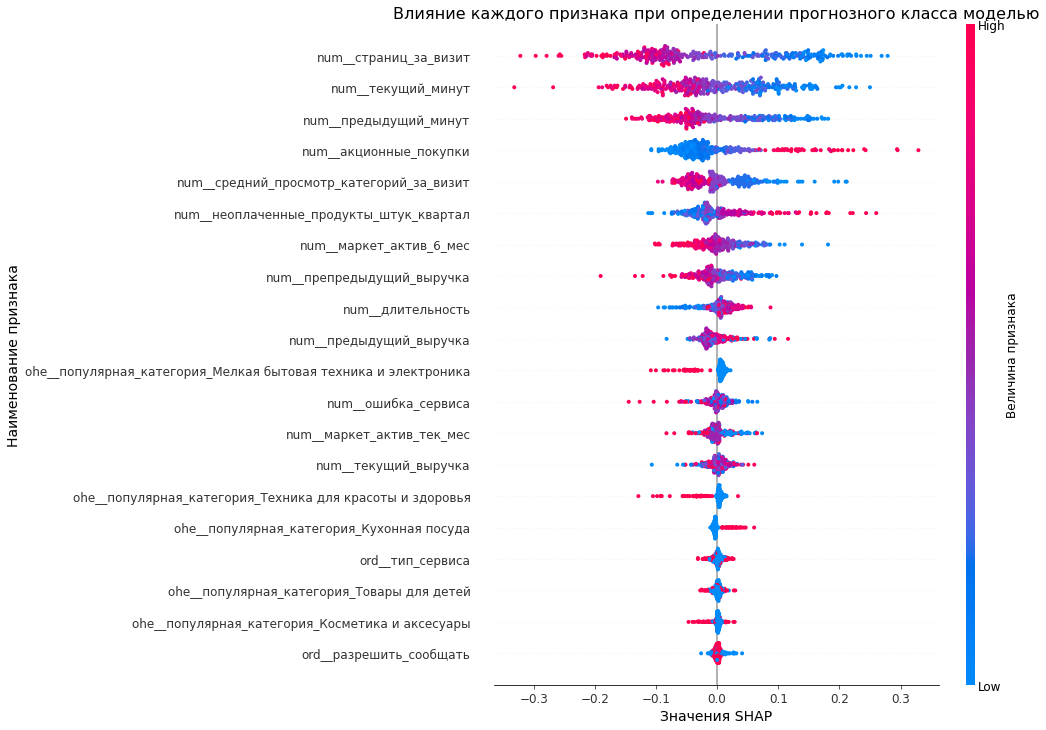

In [61]:
#объявляем график до подписания осей и установки размеров и указываем show=False, 
#чтобы можно дополнительно было настроить график после его создания.
#параметром plot_size расстягиваем значения по ширине, чтобы они было не узкие
shap.summary_plot(shap_values, show=False, plot_size=[15,10])

#объявляем фигуру и объекты осей
fig, ax = plt.gcf(), plt.gca()

#размер наименования подписи каждого признака
ax.tick_params(labelsize=12)

#подписи осей и наименования графика
ax.set_xlabel("Значения SHAP", fontsize=14)
ax.set_ylabel("Наименование признака", fontsize=14)
ax.set_title('Влияние каждого признака при определении прогнозного класса моделью', fontsize=16)

# Установить размер для величин high и low 
fig.axes[1].tick_params(labelsize=12)
#установить размер подписи цветовой шкалы
fig.axes[1].set_ylabel("Величина признака", fontsize=12)

#отображение конечного графика
plt.show()

**Полученные графики позволяют сделать следующие выводы:** 

**По сравнению с графиком, полученным при помощи permutation_importance, при анализе важности признаков при помощи SHAP изменилось третье место по важности признаков, распределение лидеров теперь следующее:**

 - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца
 - кол-во минут, проведенных в предыдущем месяце
 - кол-во минут, проведенных в текущем месяце
 - доля акционных покупок от общего количества
 - среднее количество просматриваемых категорий за визит
    
**Признаки, которые менее других влияют на то, изменится покупательская способность или нет:**
 - разрешение на присылание покупателю дополнительные предложения о товаре
 - тип подписки
 - кол-во сбоев сервиса, которые были у покупателя
 
**Учитывая, что класс 0 - это покупатели с прежним уровнем покупательской активности, а класс 1 - покупатели, у которых покупательская активность снижена, график пчелиного роя позволяет сделать следующие выводы:**
- увеличение количества просматриваемых страниц с товарами на сайте склоняет модель чаще относить покупателей к классу 0 - с сохраняющейся покупательской способностью
-  при увеличении значений количества минут, проведенных на сайте в текущем и предыдущем месяце, вероятность отнесения к классу с прежней покупатеслькой способностью также увеличивается.
- при увеличении количества неоплаченных товаров в корзине вероятность отнесения к классу со снижающейся покупательской активностью также увеличивается. Широкая горизонтальная линия этого признака слева от центральной линии говорит о том, что модель уверенно присваивает SHAP-значения, с учётом закономерностей в данных, при меньшем кол-ве неоплаченных товаров в корзине, модель вероятней отнесет покупателя к классу 0 с прежним уровнем покупательской активности
- чем меньше доля акционных товаров от общего количества купленных товаров, тем больше вероятность, что модель присвоит прежний уровень покупательской активности.
- чем вышел количество просматриваемых категорий и больше внимание покупателя занято сайтом, тем выше вероятность того, что ему будет присвоен прежний уровень покупательской активности.

**При принятии моделировании и принятии бизнес решений можно предложить следующие общие рекомендации:**
- для увеличения времени, проводимого на сайте пользователями и удержания его покупательской активности, нужно расширять асортимент товара и категорий
- также для привлечения внимания и времени, проведенного на сайте можно увеличить число рекомендаций для привлечения внимания покупателя именно к тем товарам, которые ему интересно смотреть.
- чтобы уменьшить количество неоплаченных товаров в корзине, можно рассылать уведомления тем, кто дал на это разрешение, о том, что товары, добавленные в корзину, скоро закончатся, это лишний раз поспособствует тому, чтобы покупатель зашел еще раз в корзину и принял решение о покупке, так делают почти все маркетплейсы.
- чтобы покупатель еще больше смотрел категорий и товаров можно увеличить скорость загрузки и работы сайта, чтобы за то же количество времени пользователь посмотрел еще больше товаров
- не делать слишком много ненастоящих акционных цен на множество позиций товара, нужно чтобы покупатель стремился покупать товары по основной цене, может попробовать лучше добавить больше скидок на второй или третий товар. 

*При использовании других Explainer были получены следующие результаты:*

*- KernelExplainer построил такие же графики, только обрабатывал значения 3 часа 47 минут для 325 строк тестовой выборки*

*- explainers.Permutation - построил такие же графики и обрабатывал значения также около 4 минут, как и обычный Explainer для 325 строк тестовой выборки*

## Сегментация покупателей

### Добавление прогнозных значений  и информации о прибыли

С помощью полученной лучшей модели спрогнозируем значение целевого признака для всего датасета `data_all`.

Получаем прогноз активности пользователей для всего датасета `data_all` с помощью лучшей обученной модели из пайплайна

In [62]:
activity_predict = grid.best_estimator_.predict(data_all.drop(['id', 'покупательская_активность'], axis=1))

#проверяем длину полученного прогноза
len(activity_predict)

1297

На всякий случай проверяем метрикой accuracy, что прогноз выполнился верно и с индексами проблем не возникло и ничего не перемешалось

In [63]:
accuracy_score(data_all['покупательская_активность'], activity_predict) 

0.912875867386276

92.1% верных предсказаний, ничего не перемешалось. Теперь создаем новый датафрейм `segmented_data` на основе всех признаков из `data_all`, только вместо реальных значений покупательской активности вставляем свои спрогнозированные значения

In [64]:
predict_data = data_all.copy()
predict_data['покупательская_активность'] = activity_predict

Теперь добавим данные о прибыльности покупателей из датафрейма `data_profit`

In [65]:
predict_data = predict_data.merge(data_profit, on = 'id', how = 'inner')
predict_data

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,препредыдущий_выручка,текущий_выручка,предыдущий_выручка,текущий_минут,предыдущий_минут,прибыль
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0,10,12,4.16
1,215350,Прежний уровень,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8,3.13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0,13,11,4.87
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,5807.5,11,8,4.21
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,4738.5,10,10,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,4704.0,4741.7,3664.0,7,14,4.44
1293,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,5299.0,5353.0,4729.0,11,12,6.11
1294,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5334.0,5139.2,5160.0,18,12,3.29
1295,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4725.0,5224.6,4923.0,7,18,4.03


Проверим, пропуски во всем датафрейме

In [66]:
predict_data.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
препредыдущий_выручка                  0
текущий_выручка                        0
предыдущий_выручка                     0
текущий_минут                          0
предыдущий_минут                       0
прибыль                                0
dtype: int64

**Пропуски отсутствут. Создан датафрейм с прогнозными значениями вместо реальных для всех активных клиентов и добавлена информация о прибыли, которую зарабатывает ежемесячно с каждого покупателя интернет-магазин**

### Выбор сегмента покупателей и его анализ

В качестве исследуемого сегмента покупателей возьмем группу клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью, сперва оставим в датафрейме `predict_data` только клиентов с прогнозными значениями снижения покупательской активности, после чего посмотрим распределение прибыльности и оставим наиболее прибыльную часть клиентов из всей группы.


Сперва посмотрим распределение прибыльности из всех покупателей, чтобы выделить сегмент с наиболее высокой прибыльностью

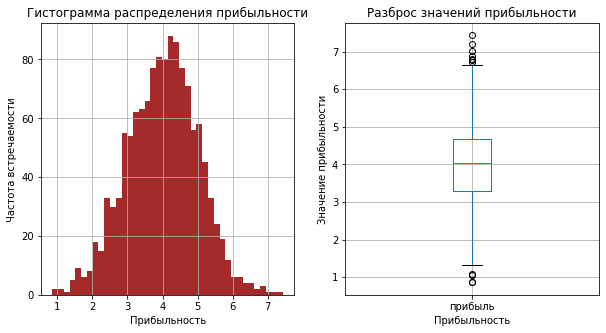

count    1297.000000
mean        3.997610
std         1.010813
min         0.860000
25%         3.300000
50%         4.040000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
predict_data['прибыль'].plot(kind='hist', bins=40, ax=axes[0], grid = True, color = 'brown')
axes[0].set_title('Гистограмма распределения прибыльности')
axes[0].set_xlabel('Прибыльность')
axes[0].set_ylabel('Частота встречаемости')
predict_data['прибыль'].plot(kind='box', ax=axes[1], rot=0, grid = True, legend = False)
axes[1].set_title('Разброс значений прибыльности')
axes[1].set_xlabel('Прибыльность')
axes[1].set_ylabel('Значение прибыльности')
plt.show()

predict_data['прибыль'].describe()

В качестве покупателей с наибольшей прибыльностью возьмем 25% покупателей, имеющих прибыльность выше 3 квартиля (выше 75 квантиля)

Теперь оставим в датафрейме `predict_data` только пользователей с наибольшей прибыльностью и с прогнозным значением покупательской активности `Снизилась`, для которых модель предсказала высокую вероятность снижения покупательской активности.

In [68]:
segmented_data_high_profit = predict_data.query('покупательская_активность == "Снизилась" and прибыль > 4.67')
segmented_data_high_profit

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,препредыдущий_выручка,текущий_выручка,предыдущий_выручка,текущий_минут,предыдущий_минут,прибыль
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0,13,11,4.87
7,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4433.0,4566.4,4146.5,7,6,4.93
17,215368,Снизилась,премиум,да,3.8,5,829,0.24,Техника для красоты и здоровья,2,2,6,1,4536.0,5591.6,5823.0,9,11,6.27
33,215384,Снизилась,стандарт,да,4.0,4,1020,0.34,Косметика и аксесуары,2,3,8,3,4226.0,4010.4,3584.0,12,11,4.78
34,215385,Снизилась,стандарт,да,3.6,4,721,0.24,Домашний текстиль,5,3,4,4,4707.0,6627.8,6184.5,8,10,4.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,215927,Снизилась,стандарт,да,5.2,4,801,0.99,Кухонная посуда,2,1,4,9,4798.0,4968.9,5108.0,9,17,5.35
580,215931,Снизилась,стандарт,нет,4.9,4,302,0.19,Кухонная посуда,1,5,3,7,5263.0,6143.4,5665.0,9,11,5.33
1082,216433,Снизилась,стандарт,нет,4.0,3,788,0.23,Товары для детей,2,3,4,7,4884.0,4996.4,4752.0,5,9,5.03
1213,216564,Снизилась,стандарт,да,5.6,4,342,0.94,Кухонная посуда,2,7,5,8,5269.0,4766.2,4930.0,19,14,5.58


Для начала посмотрим общие статистики рассматриваемого сегмента и общие распределения для всего датафрейма нашего сегмента

In [69]:
round(segmented_data_high_profit.drop('id', axis=1).describe(),2).T

,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,91.0,3.51,1.00,0.90,3.00,3.60,4.10,5.60
маркет_актив_тек_мес,91.0,4.10,0.70,3.00,4.00,4.00,5.00,5.00
длительность,91.0,619.71,241.53,152.00,448.00,666.00,807.00,1073.00
акционные_покупки,91.0,0.43,0.28,0.12,0.24,0.32,0.40,0.99
средний_просмотр_категорий_за_визит,91.0,2.34,1.13,1.00,2.00,2.00,3.00,6.00
неоплаченные_продукты_штук_квартал,91.0,4.09,2.18,0.00,2.00,4.00,6.00,10.00
ошибка_сервиса,91.0,3.75,1.80,1.00,2.00,3.00,5.00,8.00
страниц_за_визит,91.0,4.26,1.98,1.00,3.00,4.00,5.50,11.00
препредыдущий_выручка,91.0,4578.68,244.18,4119.00,4401.00,4607.00,4740.00,5269.00
текущий_выручка,91.0,5220.41,865.58,3078.30,4518.60,5247.20,5843.95,7063.00


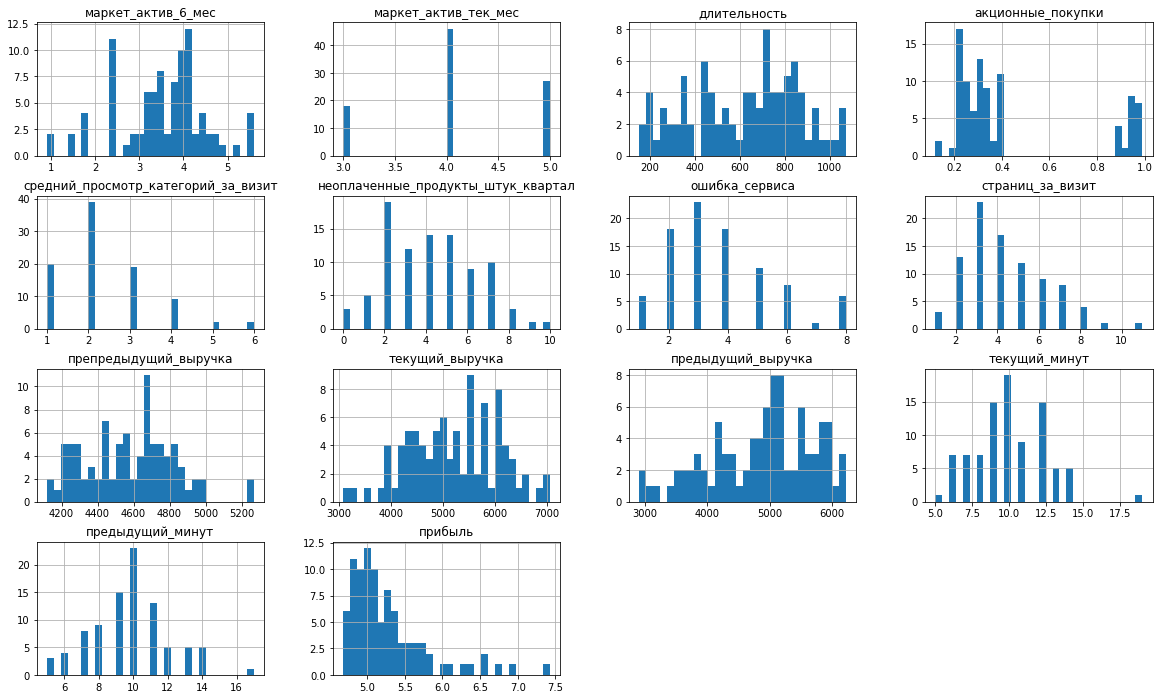

In [70]:
segmented_data_high_profit.drop('id',axis=1).hist(bins=30,figsize=(20,12))
plt.show()

**Полученные статистики и графики позволяют увидеть следующее:**
 - большинство гистограмм не так сильно похожи на нормальное распределение по сравнению с графиками всех клиентов, что логично, так как мы взяли всего небольшую часть, поэтому на графиках присутствует больше выборосов и перекосов.
 - среднее количество получаемой выручки от месяца к месяцу увеличивается.
 - в среднем количество минут, проведенное на сайте в предыдущем и текущем месяце не изменилось, около 10 минут. Мы помним, что анализ SHAP показал, что этот один из важных признаков при прогнозировании покупательской активности, поэтому рассмотрим  сравнение времени с прогнозным уровнем покупательской активности `снизилась` и `прежний уровень` для отображения проводимого времени на сайте.
 - акционные покупки немного выше, чем у всех покупателей (медианное значение 32% покупки по акциям у данного сегмента против 24% покупок у всех пользователей). По анализу SHAP было видно, что при покупки большего числа товаров по акции вероятность отнесения покупателя к классу со сниженным уровнем активности будет выше. Значит нужно привлекать пользователя к постоянным покупкам именно  обычных товаров без акций. 
 - самое частое значение важного признака - среднее кол-во просмотренных категорий за визит ниже, чем среднее значение этого же признака у всех пользователей (2 категории против 3), анализ SHAP показал, что чем ниже просмотрено категорий в среднем за визит, тем выше вероятность снижения покупательской активности.
 - медианное значение самого важного признака по результатам анализа SHAP - кол-во просматриваемых страниц за визит, в два раза меньше, чем у всех пользователей (4 просмотренных страницы за визит против 8 страниц у всех пользователей) также увеличивает вероятность отнесения такого покупателя к классу со сниженной покупательской активности

*Для наглядности посмотрим соотношение покупателей с разными типами подписки и разрешением на отправку рекламных рассылок и акций в выбранном сегменте покупателей, хоть это самые неважные признаки при прогнозировании модели, судя по результатам анализа SHAP*

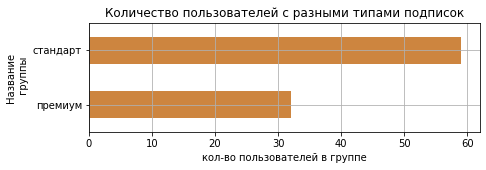

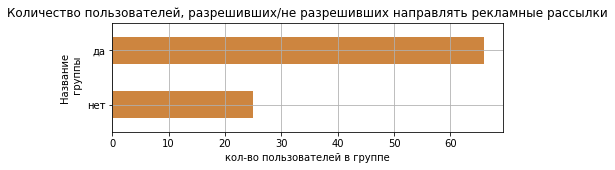

In [71]:
for g,c in ['тип_сервиса','Количество пользователей с разными типами подписок'], \
    ['разрешить_сообщать','Количество пользователей, разрешивших/не разрешивших направлять рекламные рассылки']:
    segmented_data_high_profit.groupby([g])[g].count().sort_values(ascending = True).\
    plot(kind = 'barh', figsize = (7,2), grid = True, title = c, color = 'peru')
    plt.xlabel('кол-во пользователей в группе')
    plt.ylabel('Название \n группы')
    plt.xticks(rotation = 0)
    plt.show()

Также глянем суммарную прибыль от каждой подписки

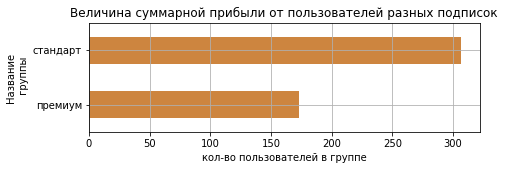

In [72]:
segmented_data_high_profit.groupby(['тип_сервиса'])['прибыль'].sum().sort_values(ascending = True).\
plot(kind = 'barh', figsize = (7,2), grid = True, \
     title = 'Величина суммарной прибыли от пользователей разных подписок', color = 'peru')
plt.xlabel('кол-во пользователей в группе')
plt.ylabel('Название \n группы')
plt.xticks(rotation = 0)
plt.show()

**Из графиков видно следующее:**
- количество пользователей анализируемого сегмента имеют в два раза больше тип сервиса `стандарт` (более 60), чем премиум, в связи с этим и величина прибыли пользователей с типом сервиса `стандарт` тоже практически в два раза больше.
- количество пользователей, разрешивших рассылку рекламных рассылок более чем в два раза (почти 70) превышает кол-во пользователей, запретивших ее. Это нужно учитывать при рассылке рекламы, например, рассылать больше товаров покупателям из популярных категорий для данного сегмента. 

Дополнительно посмотрим, присутствует ли сильная корреляция между прибылью и количественными признаками

In [73]:
segmented_data_high_profit.drop('id',axis=1).corr()[['прибыль']]

,прибыль
маркет_актив_6_мес,1.883536e-01
маркет_актив_тек_мес,2.597555e-01
длительность,-1.822205e-01
акционные_покупки,1.128722e-02
средний_просмотр_категорий_за_визит,-5.541437e-02
неоплаченные_продукты_штук_квартал,-1.037086e-01
ошибка_сервиса,-2.168042e-02
страниц_за_визит,-2.894434e-02
препредыдущий_выручка,4.290612e-02
текущий_выручка,1.468672e-01


*Видна только слабая корреляция между прибылью и числом рассылок, звонков и показов рекламы в текущем месяце, коэффициент корреляции 0.25*

Для подробного изучения разницы в одном сегменте покупателей с наиболее высокой прибылью, но с разными прогнозами покупательской активности, сравним медианные значения наиболее важных метрик для разных групп: с прогнозными значениями `снизилась` и `прежний уровень`, построив столбчатые диаграммы для возьми самых важных признаков

Создадим датафрейм с медианными значениями всех метрик наиболее прибыльных покупателей  для двух разных групп прогнозных значений покупательской активности

In [74]:
comparison_median = pd.concat(
#создаем датафрейм, состоящий из столбца с признаками и столбца с медианными значениями метрик для наиболее прибыльных 
#покупателей с прогнозными значениями покупательской активности `снизился` 
    [round(segmented_data_high_profit.drop('id', axis=1).describe(),2).T.loc[:,['50%']].rename(columns = {'50%': 'Снизилась'}),
#создаем датафрейм, состоящий из столбца с признаками и столбца с медианными значениями метрик для наиболее прибыльных 
#покупателей с прогнозными значениями покупательской активности `Прежний уровень` 
     round(predict_data.query('покупательская_активность == "Прежний уровень" and прибыль > 4.67').\
          drop('id', axis=1).describe(),2).T.loc[:,['50%']].rename(columns = {'50%': 'Прежний уровень'})],axis=1
    )
comparison_median

,Снизилась,Прежний уровень
маркет_актив_6_мес,3.60,4.40
маркет_актив_тек_мес,4.00,4.00
длительность,666.00,615.00
акционные_покупки,0.32,0.21
средний_просмотр_категорий_за_визит,2.00,4.00
неоплаченные_продукты_штук_квартал,4.00,2.00
ошибка_сервиса,3.00,4.00
страниц_за_визит,4.00,9.00
препредыдущий_выручка,4607.00,4960.50
текущий_выручка,5247.20,5103.50


Для наглядности сравнения визуализируем медианные значения нескольких самых важных количественных признаков. Список признаков возьмем из `feature_importance`. Добавим конструкцию try-except для категориальных признаков, чтобы они пропускались без ошибки и графики строились для количественных признаков без ошибок

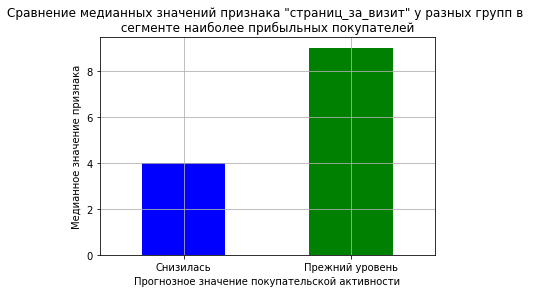

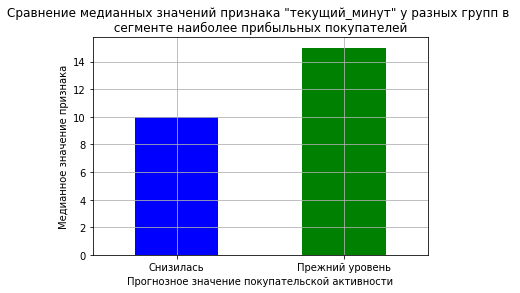

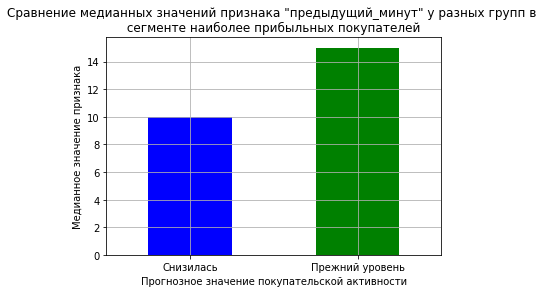

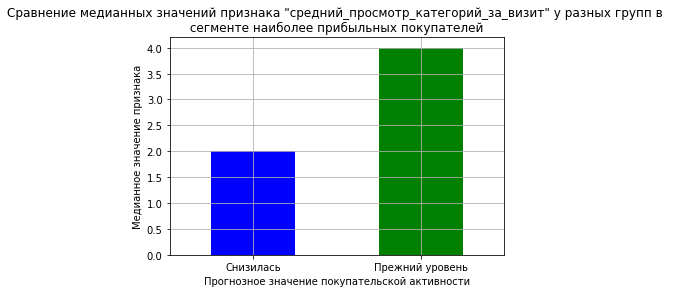

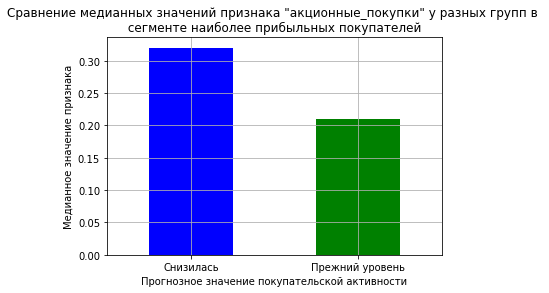

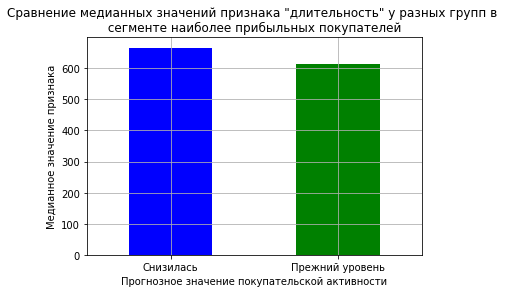

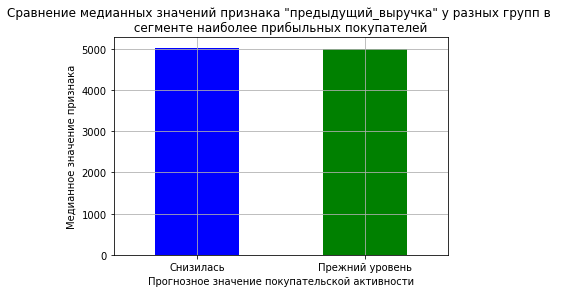

In [75]:
for row in list(feature_importance['Feature'][:8]):
    try:
        comparison_median.loc[row,:].plot(kind='bar', color=['blue','green'],grid = True, legend = False)
        plt.xlabel('Прогнозное значение покупательской активности')
        plt.ylabel('Медианное значение признака')
        plt.title(f'Сравнение медианных значений признака "{row}" у разных групп в \n сегменте наиболее прибыльных покупателей ')
        plt.xticks(rotation=0)
        plt.show()
    except:
        pass

**В соответсвии с данными графиками, с результатами анализа SHAP, с прогнозными значениями и реальными значеними целевого признака можно сделать следующие выводы:**
 - у покупателей с меньшим количеством просмотренных страниц с товарами повышается вероятность снижения покупательской активности.
 - у покупателей с меньшим количеством просмотренных категорий с товарами повышается вероятность снижения покупательской активности.
 - с повышением доли акционных товаров от общего количества товаров повышается вероятность снижения покупательской активности.
 - у покупателей с меньшим количеством проведенных минут на сайте повышается вероятность снижения покупательской активности.
 - уменьшение числа рассылок, звонков, показов рекламы повышают вероятность снижения покупательской активности.
 - увеличение количества неоплаченных товаров в корзине также повышает вероятность снижения покупательской активности.
 

Теперь посмотрим сколько прибыли приносит каждая категория в общем

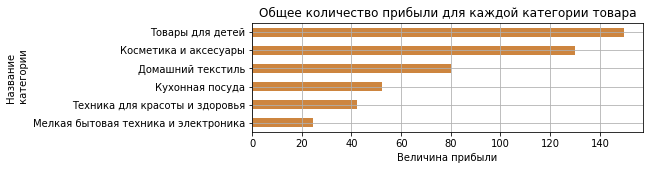

In [76]:
segmented_data_high_profit.groupby(['популярная_категория'])['прибыль'].sum().sort_values(ascending = True).\
plot(kind = 'barh', figsize = (7,2), grid = True, title = 'Общее количество прибыли для каждой категории товара', color = 'peru')
plt.xlabel('Величина прибыли')
plt.ylabel('Название \n категории', rotation = 90)
plt.xticks(rotation = 0)
plt.show()

**По графику видно, что самую высокую прибыль приносят категории `товары для детей` и `косметика и аксессуары`, самую меньшую - `мелкая бытовая техника и электроника`, значит для данного сегмента больше всего пользуются спросом товары с высокой периодичностью обновления**

Для более детального изучения выбранного сегмента покупателей (наиболее прибыльные и с высокой вероятностью снижения покупательской активности) и подбора рекомендаций по увеличению страниц с необходимыми товарами и категориями рассмотрим значения прибыльности для каждой категории купленных товаров, построив для этого диаграммы размаха с разбивкой по категориям

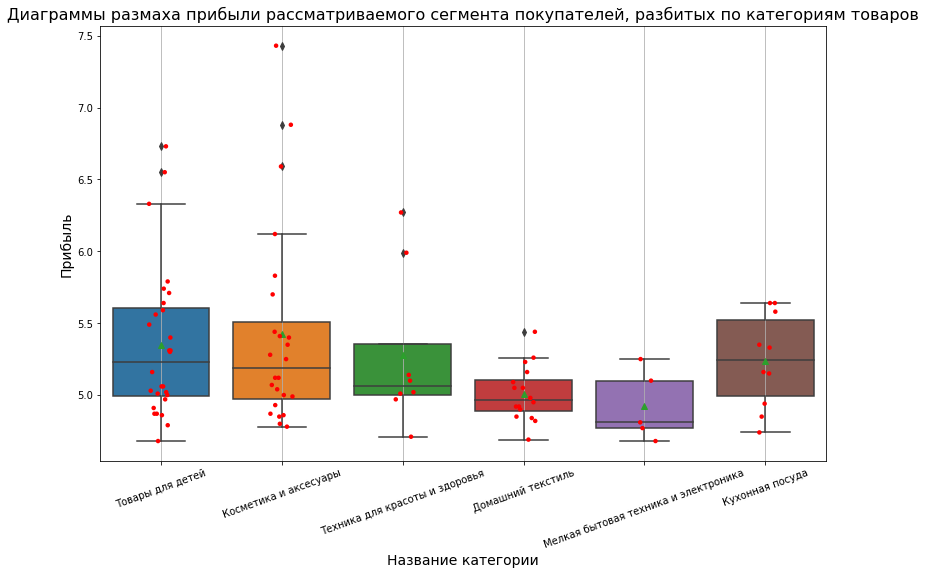

In [77]:
plt.figure(figsize=(13, 8))
ax = sns.boxplot(x = 'популярная_категория', y = 'прибыль', showmeans = True, data=segmented_data_high_profit)
ax = sns.stripplot(x = 'популярная_категория', y = 'прибыль', data=segmented_data_high_profit, color='red', size=4.5, jitter=1)
ax.tick_params(axis='x', labelrotation=20)
#оформляем график и подписываем оси
plt.grid(True, axis = 'x')
# добавляем названия графика и осей
ax.set_title('Диаграммы размаха прибыли рассматриваемого сегмента покупателей, разбитых по категориям товаров', fontsize=16)
ax.set_xlabel('Название категории', fontsize=14)
ax.set_ylabel('Прибыль', fontsize=14)

# отображаем график
plt.show()

**По графику видно следующее:**
- медианные значения прибыльности и межквартальный размах выбранного сегмента покупателей выше всего у пользователей в категории товары для детей и кухонная посуда, но в категории товары для детей намного больше покупателей
- также очень привлекательна категория косметика и аксессуары, так как она имеет большое количество покупателей, широкий межквартильный размах и среднее значение намного выше медианного, так как в этой категории больше всех выбросов
- на третьем месте по популярности показывает себя категория домашний текстиль, хоть медианное значение прибыльности не самое высокое, но зато количество покупателей достаточно большое

**Можно выделить несколько категорий товаров, расширение ассортимента в которых повысит вероятность сохранения покупательской активности выбранного сегмента на прежнем уровне, так как это увеличит кол-во просматриваемого товара и  также увеличит время нахождения на сайте:**
 - товары для детей
 - косметика и аксесуары
 - домашний текстиль
 


**Выводы при работе с определенным сегментов покупателей следующие:**
- был создан датафрейм с прогнозными значениями вместо реальных для всех активных клиентов (1297 пользователей) и добавлена информация о прибыли, которую зарабатывает ежемесячно с каждого покупателя интернет-магазин
- в качестве исследуемого сегмента покупателей был выбран сегмент с `наибольшей прибыльностью (>4.67, 25% от общего количества покупателей) и наибольшей вероятностью снижения покупательской активности` в соответсвии с прогнозными значениями лучшей модели.

**При рассмотрении статистик и общих графиков распределения для выбранного сегмента были получены следующие результаты**
 - большинство гистограмм не так сильно похожи на нормальное распределение по сравнению с графиками всех клиентов, что логично, так как мы взяли всего небольшую часть, поэтому на графиках присутствует больше выборосов.
 - среднее количество получаемой выручки от месяца к месяцу увеличивается.
 - в среднем количество минут, проведенное на сайте в предыдущем и текущем месяце не изменилось, около 10 минут. Мы помним, что анализ SHAP показал, что этот один из важных признаков при прогнозировании покупательской активности, поэтому рассмотрим  сравнение времени с прогнозным уровнем покупательской активности `снизилась` и `прежний уровень` для отображения проводимого времени на сайте.
 - акционные покупки немного выше, чем у всех покупателей (медианное значение 32% покупки по акциям у данного сегмента против 24% покупок у всех пользователей). По анализу SHAP было видно, что при покупки большего числа товаров по акции вероятность отнесения покупателя к классу со сниженным уровнем активности будет выше. Значит нужно привлекать пользователя к постоянным покупкам именно  обычных товаров без акций. 
 - самое частое значение важного признака - среднее кол-во просмотренных категорий за визит ниже, чем среднее значение этого же признака у всех пользователей (2 категории против 3), анализ SHAP показал, что чем ниже просмотрено категорий в среднем за визит, тем выше вероятность снижения покупательской активности.
 - медианное значение самого важного признака по результатам анализа SHAP - кол-во просматриваемых страниц за визит, в два раза меньше, чем у всех пользователей (4 просмотренных страницы за визит против 8 страниц у всех пользователей) также увеличивает вероятность отнесения такого покупателя к классу со сниженной покупательской активности
 
**При рассмотрении разных групп покупателей в исследуемом сегменте были получены следующие результаты:**
- количество пользователей выбранного сегмента имеют в два раза больше тип сервиса `стандарт` (более 60), чем премиум, в связи с этим и величина прибыли пользователей с типом сервиса `стандарт` тоже практически в два раза больше.
- количество пользователей, разрешивших рассылку рекламных рассылок более чем в два раза (почти 70) превышает кол-во пользователей, запретивших ее. Это нужно учитывать при рассылке рекламы, например, рассылать больше товаров покупателям из популярных категорий для данного сегмента. 

**Для подробного изучения разницы в выбранном сегменте покупателей были сравнены медианные значения наиболее важных метрик. Учитывая результаты сравнения и результаты анализа SHAP, можно сделать следующие выводы:**
 - у покупателей с меньшим количеством просмотренных страниц с товарами повышается вероятность снижения покупательской активности.
 - у покупателей с меньшим количеством просмотренных категорий с товарами повышается вероятность снижения покупательской активности.
 - с повышением доли акционных товаров от общего количества товаров повышается вероятность снижения покупательской активности.
 - у покупателей с меньшим количеством проведенных минут на сайте повышается вероятность снижения покупательской активности.
 - уменьшение числа рассылок, звонков, показов рекламы повышают вероятность снижения покупательской активности.
 - увеличение количества неоплаченных товаров в корзине также повышает вероятность снижения покупательской активности.
 
*При рассмотрении величины прибыли и средних значений в разных категориях товара выбранного сегмента были получены следующие результаты:*
- самую высокую прибыль приносят категории `товары для детей` и `косметика и аксессуары`, самую меньшую - `мелкая бытовая техника и электроника`.
- медианные значения прибыльности и диапазон самых часто встречающихся значений выбранного сегмента покупателей выше всего у пользователей в категории товары для детей и кухонная посуда, но в категории товары для детей намного больше покупателей
- также очень привлекательна категория косметика и аксессуары, так как она имеет большое количество покупателей и  широкий межквартильный размах
- на третьем месте по популярности показывает себя категория домашний текстиль, хоть медианное значение прибыльности не самое высокое, но зато количество покупателей достаточно большое
- при изучении зависимости между прибылью и признаками наблюдается только слабая корреляция между прибылью и числом рассылок, звонков и показов рекламы в текущем месяце, коэффициент корреляции 0.25

**Поэтому можно выделить несколько категорий товаров, расширение ассортимента в которых повысит вероятность сохранения покупательской активности выбранного сегмента на прежнем уровне, так как это увеличит кол-во просматриваемого товара и  также увеличит время нахождения на сайте:**
 - товары для детей
 - косметика и аксесуары
 - домашний текстиль

**Рекомендации по увеличению покупательской активности, учитывая результаты графиков и моделирования могут быть следующими:**

 -  необходимо увеличить время пребывания на сайте и количество товаров для исследуемого сегмента покупателей, для этого необходимо расширять ассортимент товара в категориях, которые больше всего пользуются спросом у нашего сегмента:
  - товары для детей
  - косметика и аксесуары
  - домашний текстиль
 - учитывая, что с увеличением кол-ва просматриваемых категорий увеличивается вероятность сохранения покупательской активности, то дополнительно для увеличения времени пребывания на сайте и количества просматриваемых категорий можно предложить добавление несколько новых категорий, которые будут смежными с самыми популярными категориями: 
  - к товарам для детей можно добавить категорию сказки и обучающие книги для детей или детская мебель (при условии, что товары для питания, одежда детская уже входят в эту категорию, если нет, то тоже можно добавить)
  - к косметики и аксесуарам можно добавить категорию спа-товаров (крема,свечи, масла) или категорию для маникюра с лаками и инструментами для его нанесения.
 - при увеличении маркетинговых коммуникаций увеличивается вероятность сохранения покупательской активности, поэтому для пользователей сегмента, кто дал согласие на отправку рекламных рассылок, нужно увеличить кол-во предлагаемых товаров из самых популярных категорий данного сегмента и товаров, похожих на ранее купленные, так как товары в самых популярных категориях данного сегмента не имеют большой срок эксплуатации и периодичность обновления высока.
 - при нахождении на сайте необходимо увеличить число рекомендаций с предлагаемыми товарами, которые похожи на ранее купленные и которые пользователю будет интересно смотреть.
 - для уменьшения количества неоплаченных товаров в корзине необходимо рассылать уведомления давшим на это разрешение о том, что товары, добавленные в корзину, скоро закончатся, это усилит желание о необходимости покупки этого товара у покупателя
 - к общим рекомендациям относится увеличение скорости загрузки и работы сайта для увеличения количетсва просматриваемого товара и страниц при одинаковом количестве времени
 - для уменьшения доли покупок товаров по акции можно внедрить бонусную систему для продвижения товаров без скидки: за каждый отзыв на такой товар добавить получение пользователем баллов, которые можно использовать на следующие покупки. Тем самым мы меняем скидку для покупателя на баллы, но зато будем продвигать товар без скидки, чем больше отзывов, тем больше лояльность покупателя к такому товару. Также для увеличения лояльности покупателя к товарам без скидки необходимо лучшее визуально представление карточки товара: к товарас с отличными фотографиями и описанием, подчеркивающими уникальность товара, пользователи относятся с большей лояльностью. 

## Итоговые выводы

**В результате проведенного исследования были проделаны следующие этапы и получены следующие результаты:**

**На этапе предобработки данных были выполнены следующие действия:**
- столбцы приведены к "змеиному" регистру и убраны пробелы
- датафреймы проверены на явные и неявные пропуски
- проверены типы столбцов 
- исправлены некорректные значения в столбцах `тип_сервиса` датафрейма `data_main` и `период` датафрейма `data_time`
- в датафрейме `data_money` в столбце `выручка` аномальное значение заменено на медианное значение выручки для текущего месяца.

**На этапе исследовательского анализа были получены следующие результаты:**

**Полученные графики и статистики для количественных признаков показали:**

 - большая часть признаков имеет нормальное распределение без ярко выраженных выбросов
 - самое часто встречающееся значение маркетинговых коммуникаций компаний и для периода в 1 месяц и в 6 месяцев составляет около 4
 - нет пользователей, зарегистрировавшихся менее чем 110 дней назад, что действительно может говорить о том, что об интернет магазине знают уже многие пользователи и новых клиентов найти тяжело, есть пользователи, которые зарегистрированы более 3 лет
 - доля акционных товаров разбита на два диапазона: 10%-40% и 90%-99% от общего числа покупаемых товаров. В первый диапазон входит подавляющее большинство покупателей с пиком в районе 15%. В остальные диапазоны, включа 0%, входит оччень малое число покупателей. Интересно посмотреть, как доля покупок акционных товаров связана с маркетинговыми рассылками.
 - самое частое количество просматриваемых категорий за визит составляет 3
 - количество неоплаченных продуктов в в корзине за квартал в среднем составляет низкое количество - от 1.5 до 2, что может говорить о том, что покупатели дожидаются небольшой скидки и в любом случае покупают большинство товаров, отложенных в корзине, но точно о таком можно говорить только после проверки применения дополнительных скидок к товаров после добавления их в корзину. Также это может говорить о том, что товар по цене все-таки подходить покупателям после проверки с другими сервисами и поэтому покупатель оплачивает товары в корзине. Также наблюдается, что частота встречаемости неоплаченных товаров больше 5 резко падает и к 10 товарам становится близкой 0.
 - среднее кол-во ошибок сервиса равняется 4, наибольшее значение равно 8.
 - наиболее часто покупатели смотрят 6 страниц с товарами, но есть уникальное меньшинство, которые могут пролистать до 20 страниц с товарами
 - самое частое значение выручки в районе 5000, есть небольшой выброс в 0 из-за нескольких пользователей, которые не совершали покупки, этих пользователей мы не будем учитывать при отборе данных для модели, так как наша задача удержание активных пользователей. Если учитывать, что значение прибыли представлено в тысячах, то в среднем за месяц прибыль от общей выручки составляет около 80%, что является высоким показателем.
 - больше всего пользователи в среднем в месяц проводят на сайте в районе 14 минут.
 - большее всего выручки было получено в текущем месяце
 - в предыдущем месяце пользователи немного больше провели в общей сумме на сайте, чем в текущем месяце.

**Полученные диаграммы для категориальных признаков показали:**

- большая часть покупателей осталась на прежнем уровне активности, наблюдается небольшой дисбаланс целевого признака:
    - 61,7 % (802 покупателя) остались на прежнем уровне активности;
    - 38,3 % (498 покупателей) снизили активность;
- большинство пользователей предпочитают подписку стандарт - 71.7% (924 покупателя);
- большинство пользователей разрешили получать рекламные расслыки - 74% (962покупателя);
- рейтинг самых популярных категорий товаров у покупателей получился следующим:
  - товары для детей - 25.4%
  - домашний текстиль - 19.3%
  - косметика и аксессуары - 17.2% 
  - техника для красоты и здоровья - 14.2%
  - мелкая бытовая техника и электроника - 13.4%
  - кухонная посуда - 10.6%
- выборка покупателей по периодам получения выручки с них дана равномерная: данные представлены для всех 1300 покупателей в текущем, предыдущем и препредыдущем месяцах (так как в данном датафрейме нет строк с явными дубликатами), при объединении таблиц проверим, что клиенты соответствуют клиентам из датафрейма `data_main`
- время, проведененное в текущем месяце и предыдущем также преставлены для каждого из 1300 клиентов датафрейма `data_main`, при объединении таблиц проверим, что клиенты соответствуют клиентам из датафрейма `data_main`

*Также для дальнейшего исследования были отобраны активные пользователи, которые регулярно в течении трех месяцев совершали покупки.*

**На этапе объединения таблиц была получена общая таблица, включающая данные о выручке и времени проведения на сайте каждого пользователя, разбитых по месяцам.**

**На этапе корреляционного анализа полученные матрицы корреляции позволили сделать следующие выводы:**
 - между входными признаками не присутствует мультиколлинеарности. Самая тесная связь между входными признаками наблюдается между `предыдущий_выручка` и `текущий_выручка`, коэффициент корреляции составляет 0.84, обучении модели можно будет попробовать удалить один из этих входных признаков.
 - есть входные признаки, которые имеют коэффициент корреляции 0 с целевым: `маркет_актив_тек_мес` и `разрешить_сообщать`. Можно будет попробовать при подборе входных признаков для обучения модели убрать эти два признака, может они только мешают более точному обучению модели.
 - самая сильная связь у целевого признака `покупательская_активность`с входным признаком `страниц_за_визит`. 
 
 **При использовании пайплайнов для подбора лучшей модели были проделаны следующие шаги и получены следующие результаты**
- создан итоговый пайплайн, включающий:
  - подготовку данных:
   - использование двух методов кодирования категориальных признаков: при помощи OneHotEncoder() и OrdinalEncoder()
   - использование нескольких вариантов масштабирования количественных признаков: MinMaxScaler(), StandardScaler() и вариант без маштабирования
  - перебор моделей KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC() с их гиперпараметрами при помощи инструментов автоматизированного подбора GridSearchCV() и RandomizedSearchCV().
- для оценивания качества получаемых моделей была выбрана метрика ROC-AUC, так как она оценивает качество решений модели в наиболее общем виде, учитывая все возможные пороговые значения и не зависит от того, какой порог мы выберем и поэтому является самой общей оценкой итогов работы модели
- инструменты автоматизированного подбора гиперпараметров для моделей показали следующие результаты:
  - RandomizedSearchCV подобрал лучшую модель за 1.6 сек -  KNeighborsClassifier(n_neighbors=13), метрика ROC-AUC при кросс-валидационной проверке на тренировочной выборке получилась 0.911
  - GridSearchCV перебрал все указанные нами варианты гиперпараметров за 25.5 сек и нашел модель, которая проявила себя лучше всех при кросс-валидационной проверке на тренировочной выборке: SVC(kernel = 'rbf', C=3), метрика ROC-AUC оказалась 0.919, на тестовой выборке метрика немного упала до 0.915.
  - StandardScaler в качестве масштабирования для количественных признаков в обоих случаях оказался лучшим
  
**Лучшей моделью оказалась модель SVC() с ядром kernel = 'rbf' и с коэффициентом C=3, масштабирование количественных признаков - StandardScaler(), также она прошла проверку на адекватность и показала метрики намного выше, чем у константной модели**

*На этапе анализа важности признаков были получены следующие результаты:*

**По сравнению с графиком, полученным при помощи permutation_importance, при анализе важности признаков при помощи SHAP изменилось третье место по важности признаков, распределение лидеров по важности при анализе SHAP следующее:**

 - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца
 - кол-во минут, проведенных в предыдущем месяце
 - кол-во минут, проведенных в текущем месяце
 - доля акционных покупок от общего количества
 - среднее количество просматриваемых категорий за визит
    
**Признаки, которые менее других влияют на то, изменится покупательская способность или нет:**
 - разрешение на присылание покупателю дополнительные предложения о товаре
 - тип подписки
 - кол-во сбоев сервиса, которые были у покупателя
 
**График пчелиного роя позволил сделать следующие выводы:**
- увеличение количества просматриваемых страниц с товарами на сайте склоняет модель чаще относить покупателей к классу с сохраняющейся покупательской способностью
-  при увеличении значений количества минут, проведенных на сайте в текущем и предыдущем месяце, вероятность отнесения к классу с прежней покупатеслькой способностью также увеличивается.
- при увеличении количества неоплаченных товаров в корзине вероятность отнесения к классу со снижающейся покупательской активностью также увеличивается. Широкая горизонтальная линия этого признака слева от центральной линии говорит о том, что модель уверенно присваивает SHAP-значения, с учётом закономерностей в данных, при меньшем кол-ве неоплаченных товаров в корзине, модель вероятней отнесет покупателя к классу с прежним уровнем покупательской активности
- чем меньше доля акционных товаров от общего количества купленных товаров, тем больше вероятность, что модель присвоит прежний уровень покупательской активности.
- чем выше количество просматриваемых категорий и больше внимание покупателя занято сайтом, тем выше вероятность того, что ему будет присвоен прежний уровень покупательской активности.

**При принятии моделировании и принятии бизнес решений можно предложить следующие общие рекомендации:**
- для увеличения времени, проводимого на сайте пользователями и удержания его покупательской активности, нужно расширять ассортимент товара и категорий
- также для привлечения внимания и времени, проведенного на сайте можно увеличить число рекомендаций для привлечения внимания покупателя именно к тем товарам, которые ему интересно смотреть.
- чтобы уменьшить количество неоплаченных товаров в корзине, можно рассылать уведомления тем, кто дал на это разрешение, о том, что товары, добавленные в корзину, скоро закончатся, это лишний раз поспособствует тому, чтобы покупатель зашел еще раз в корзину и принял решение о покупке, так делают почти все маркетплейсы.
- чтобы покупатель еще больше смотрел категорий и товаров можно увеличить скорость загрузки и работы сайта, чтобы за то же количество времени пользователь посмотрел еще больше товаров
- не делать слишком много ненастоящих акционных цен на множество позиций товара, нужно чтобы покупатель стремился покупать товары по основной цене, может попробовать лучше добавить больше скидок на второй или третий товар.

**На этапе работы с определенным сегментов покупателей были получены следующие результаты:**
- был создан датафрейм с прогнозными значениями вместо реальных для всех активных клиентов (1297 пользователей) и добавлена информация о прибыли, которую зарабатывает ежемесячно с каждого покупателя интернет-магазин
- в качестве исследуемого сегмента покупателей был выбран сегмент с `наибольшей прибыльностью (>4.67, 25% от общего количества покупателей) и наибольшей вероятностью снижения покупательской активности` в соответсвии с прогнозными значениями лучшей модели.

**При рассмотрении статистик и общих графиков распределения для выбранного сегмента были получены следующие результаты**
 - большинство гистограмм не так сильно похожи на нормальное распределение по сравнению с графиками всех клиентов, что логично, так как мы взяли всего небольшую часть, поэтому на графиках присутствует больше выборосов и перекосов.
 - среднее количество получаемой выручки от месяца к месяцу увеличивается.
 - в среднем количество минут, проведенное на сайте в предыдущем и текущем месяце не изменилось, около 10 минут. Мы помним, что анализ SHAP показал, что этот один из важных признаков при прогнозировании покупательской активности, поэтому рассмотрим  сравнение времени с прогнозным уровнем покупательской активности `снизилась` и `прежний уровень` для отображения проводимого времени на сайте.
 - акционные покупки немного выше, чем у всех покупателей (медианное значение 32% покупки по акциям у данного сегмента против 24% покупок у всех пользователей). По анализу SHAP было видно, что при покупки большего числа товаров по акции вероятность отнесения покупателя к классу со сниженным уровнем активности будет выше. Значит нужно привлекать пользователя к постоянным покупкам именно  обычных товаров без акций. 
 - самое частое значение важного признака - среднее кол-во просмотренных категорий за визит ниже, чем среднее значение этого же признака у всех пользователей (2 категории против 3), анализ SHAP показал, что чем ниже просмотрено категорий в среднем за визит, тем выше вероятность снижения покупательской активности.
 - медианное значение самого важного признака по результатам анализа SHAP - кол-во просматриваемых страниц за визит, в два раза меньше, чем у всех пользователей (4 просмотренных страницы за визит против 8 страниц у всех пользователей) также увеличивает вероятность отнесения такого покупателя к классу со сниженной покупательской активности
 
**При рассмотрении разных групп покупателей в исследуемом сегменте были получены следующие результаты:**
- количество пользователей выбранного сегмента имеют в два раза больше тип сервиса `стандарт` (более 60), чем премиум, в связи с этим и величина прибыли пользователей с типом сервиса `стандарт` тоже практически в два раза больше.
- количество пользователей, разрешивших рассылку рекламных рассылок более чем в два раза (почти 70) превышает кол-во пользователей, запретивших ее. Это нужно учитывать при рассылке рекламы, например, рассылать больше товаров покупателям из популярных категорий для данного сегмента. 

**Для подробного изучения разницы в выбранном сегменте покупателей были сравнены медианные значения наиболее важных метрик. Учитывая результаты сравнения и результаты анализа SHAP, можно сделать следующие выводы:**
 - у покупателей с меньшим количеством просмотренных страниц с товарами повышается вероятность снижения покупательской активности.
 - у покупателей с меньшим количеством просмотренных категорий с товарами повышается вероятность снижения покупательской активности.
 - с повышением доли акционных товаров от общего количества товаров повышается вероятность снижения покупательской активности.
 - у покупателей с меньшим количеством проведенных минут на сайте повышается вероятность снижения покупательской активности.
 - уменьшение числа рассылок, звонков, показов рекламы повышают вероятность снижения покупательской активности.
 - увеличение количества неоплаченных товаров в корзине также повышает вероятность снижения покупательской активности.
 
*При рассмотрении величины прибыли и средних значений в разных категориях товара выбранного сегмента были получены следующие результаты:*
- самую высокую прибыль приносят категории `товары для детей` и `косметика и аксессуары`, самую меньшую - `мелкая бытовая техника и электроника`.
- медианные значения прибыльности и диапазон самых часто встречающихся значений выбранного сегмента покупателей выше всего у пользователей в категории товары для детей и кухонная посуда, но в категории товары для детей намного больше покупателей
- также очень привлекательна категория косметика и аксессуары, так как она имеет большое количество покупателей и  широкий межквартильный размах
- на третьем месте по популярности показывает себя категория домашний текстиль, хоть медианное значение прибыльности не самое высокое, но зато количество покупателей достаточно большое
- при изучении зависимости между прибылью и признаками наблюдается только слабая корреляция между прибылью и числом рассылок, звонков и показов рекламы в текущем месяце, коэффициент корреляции 0.25

**Поэтому можно выделить несколько категорий товаров, расширение ассортимента в которых повысит вероятность сохранения покупательской активности выбранного сегмента на прежнем уровне, так как это увеличит кол-во просматриваемого товара и  также увеличит время нахождения на сайте:**
 - товары для детей
 - косметика и аксессуары
 - домашний текстиль
 
**Рекомендации по увеличению покупательской активности, учитывая результаты графиков и моделирования могут быть следующими:**

 -  необходимо увеличить время пребывания на сайте и количество товаров для исследуемого сегмента покупателей, для этого необходимо расширять ассортимент товара в категориях, которые больше всего пользуются спросом у нашего сегмента:
  - товары для детей
  - косметика и аксесуары
  - домашний текстиль
 - учитывая, что с увеличением кол-ва просматриваемых категорий увеличивается вероятность сохранения покупательской активности, то дополнительно для увеличения времени пребывания на сайте и количества просматриваемых категорий можно предложить добавление несколько новых категорий, которые будут смежными с самыми популярными категориями: 
  - к товарам для детей можно добавить категорию сказки и обучающие книги для детей или детская мебель (при условии, что товары для питания, одежда детская уже входят в эту категорию, если нет, то тоже можно добавить)
  - к косметики и аксесуарам можно добавить категорию спа-товаров (крема,свечи, масла) или категорию для маникюра с лаками и инструментами для его нанесения.
 - при увеличении маркетинговых коммуникаций увеличивается вероятность сохранения покупательской активности, поэтому для пользователей сегмента, кто дал согласие на отправку рекламных рассылок, нужно увеличить кол-во предлагаемых товаров из самых популярных категорий данного сегмента и товаров, похожих на ранее купленные, так как товары в самых популярных категориях данного сегмента не имеют большой срок эксплуатации и периодичность обновления высока.
 - при нахождении на сайте необходимо увеличить число рекомендаций с предлагаемыми товарами, которые похожи на ранее купленные и которые пользователю будет интересно смотреть.
 - для уменьшения количества неоплаченных товаров в корзине необходимо рассылать уведомления давшим на это разрешение о том, что товары, добавленные в корзину, скоро закончатся, это усилит желание о необходимости покупки этого товара у покупателя
 - к общим рекомендациям относится увеличение скорости загрузки и работы сайта для увеличения количества просматриваемого товара и страниц при одинаковом количестве времени
 - для уменьшения доли покупок товаров по акции можно внедрить бонусную систему для продвижения товаров без скидки: за каждый отзыв на такой товар добавить получение пользователем баллов, которые можно использовать на следующие покупки. Тем самым мы меняем скидку для покупателя на баллы, но зато будем продвигать товар без скидки, чем больше отзывов, тем больше лояльность покупателя к такому товару. Также для увеличения лояльности покупателя к товарам без скидки необходимо лучшее визуально представление карточки товара: к товарас с отличными фотографиями и описанием, подчеркивающими уникальность товара, пользователи относятся с большей лояльностью. 